### 1.2 Across 'C' Interaction Features

In [58]:
# ========================= Across 'C' Interaction Features ==================================

# == A. Character x Capacity == 
df = df.withColumn("tl_op12m_x_inq6m", col("num_tl_op_past_12m") * col("inq_last_6mths"))
df = df.withColumn("dti_x_inq", col("dti") * col("inq_last_6mths"))
df = df.withColumn("dti/fico_ratio", col("dti") / (col("fico_score") + lit(1)))



# == B. Capacity x Capital == 
df = df.withColumn("loan_amnt/tot_hi_cred_lim", col("loan_amnt") / (col("tot_hi_cred_lim") + lit(1)))


# == C. Capacity x Condition == 
df = df.withColumn('dti_x_term', col('dti') * col('term'))


Explanation for creation of the above features are explained below (Within 'C'): 

- **Character x Capacity**
    - `tl_op12m_x_inq6m`: Lots of new tradelines and recent inquries signal financial desperation 
    - `dti_x_inq`: High dti and recent inquiries signal financial desperation, on top of inability to repay debt
    - `dti/fico_ratio`: High dti when fico is low signals high possibility of default 

- **Capacity x Capital**
    - `loan_amnt/tot_hi_cred_lim`: High loan amount with low total credit limit erodes borrower ability to repay loans 

- **Capacity x Condition**
    - `dti_x_term`: High debt locked into long terms keeps borrowers exposed to macro shocks longer


## 2. Feature Selection (WoE & IV)

After creating the interaction features, I will now be selecting features which are the most relevant (i.e. separates non-defaulters and defaulters well) and useful for our PD Model. We will be the utilising the `optbinning` library to observe monotonic trends of WoE, observe IV and WoE binning of variables. I will be following this guideline to determine strength of different variables. 

![Feature Selection](https://media.licdn.com/dms/image/v2/D5612AQEnsMrGYt9wxw/article-inline_image-shrink_1500_2232/article-inline_image-shrink_1500_2232/0/1659097050621?e=1757548800&v=beta&t=4GwB73k9LWlDDgdydkU2boqr8GAnIr-Qc73Yem58PwI)


🔍 Feature: loan_amnt
✅ Total IV for loan_amnt: 0.0261
╒══════════════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin                  │   Count │   Default Rate (%) │ WOE                  │          IV │
╞══════════════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 4212.50)      │   11702 │             0.1066 │ 0.3387231700968951   │ 0.00789575  │
├──────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [4212.50, 6037.50)   │   15138 │             0.1205 │ 0.2001677254405696   │ 0.00375158  │
├──────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [6037.50, 9012.50)   │   18428 │             0.1222 │ 0.1845994223371592   │ 0.00390614  │
├──────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [9012.50, 10012.50)  │   13888 │             0.1344 │ 0.0753247061060156   │ 0.000509866 │
├──────────────

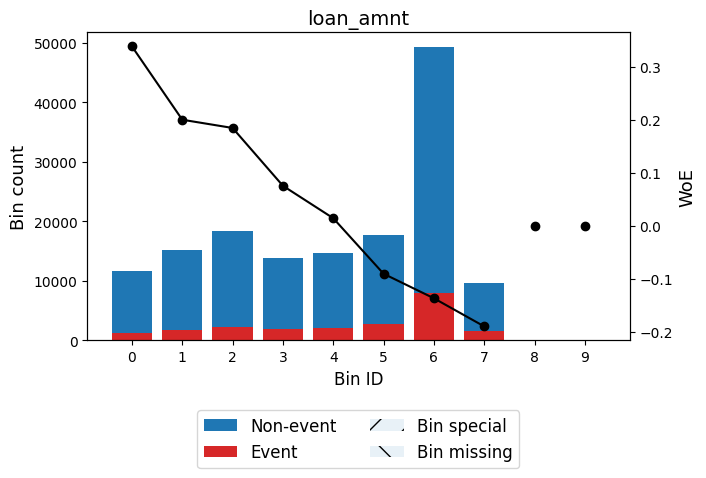


🔍 Feature: term
✅ Total IV for term: 0.0907
╒═══════════════╤═════════╤════════════════════╤═════════════════════╤═══════════╕
│ Bin           │   Count │   Default Rate (%) │ WOE                 │        IV │
╞═══════════════╪═════════╪════════════════════╪═════════════════════╪═══════════╡
│ (-inf, 48.00) │  108244 │             0.1193 │ 0.21124022754904037 │ 0.0297556 │
├───────────────┼─────────┼────────────────────┼─────────────────────┼───────────┤
│ [48.00, inf)  │   42190 │             0.205  │ -0.4325824764795516 │ 0.0609342 │
├───────────────┼─────────┼────────────────────┼─────────────────────┼───────────┤
│ Special       │       0 │             0      │ 0.0                 │ 0         │
├───────────────┼─────────┼────────────────────┼─────────────────────┼───────────┤
│ Missing       │       0 │             0      │ 0.0                 │ 0         │
├───────────────┼─────────┼────────────────────┼─────────────────────┼───────────┤
│               │  150434 │             0.

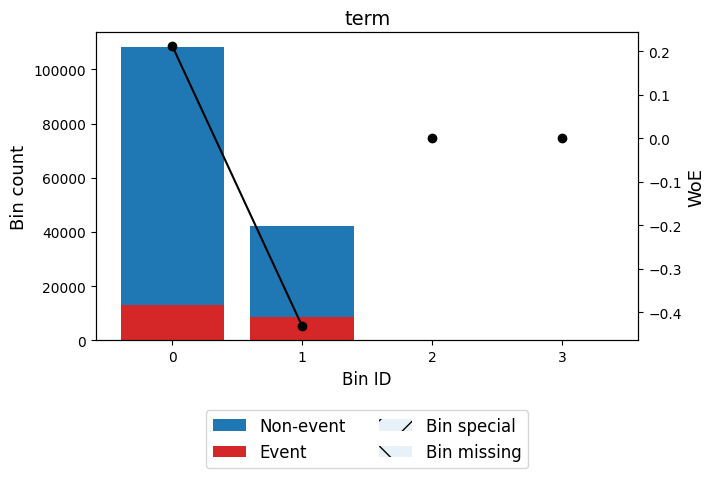


🔍 Feature: annual_inc
✅ Total IV for annual_inc: 0.0288
╒════════════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin                    │   Count │   Default Rate (%) │ WOE                   │          IV │
╞════════════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 36014.82)       │   18670 │             0.1703 │ -0.20392396789024225  │ 0.00554508  │
├────────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [36014.82, 44236.50)   │   13456 │             0.1682 │ -0.1890192798300725   │ 0.00341593  │
├────────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [44236.50, 54567.00)   │   21189 │             0.1582 │ -0.11625307680466368  │ 0.0019836   │
├────────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [54567.00, 61801.50)   │   15315 │             0.1492 │ -0.04672812929521686 

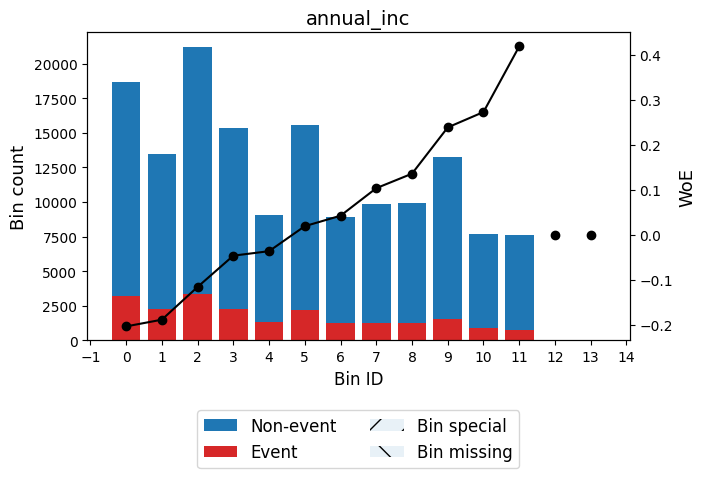


🔍 Feature: dti
✅ Total IV for dti: 0.0629
╒════════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                  │          IV │
╞════════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 7.42)   │   14353 │             0.0963 │ 0.45156787492725536  │ 0.016516    │
├────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [7.42, 9.22)   │    7700 │             0.1082 │ 0.32183247036803087  │ 0.00471925  │
├────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [9.22, 10.91)  │    8678 │             0.1129 │ 0.2735467660932711   │ 0.00391068  │
├────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [10.91, 12.97) │   12146 │             0.1182 │ 0.22169991774782227  │ 0.00366375  │
├────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤


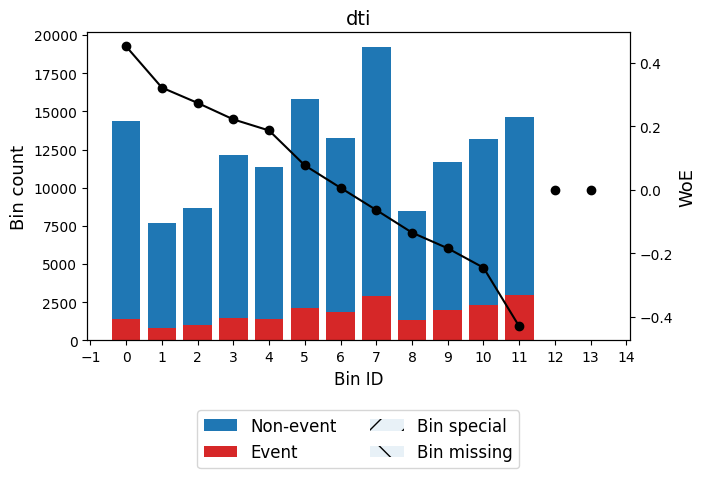


🔍 Feature: delinq_2yrs
✅ Total IV for delinq_2yrs: 0.0020
╒══════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 0.50) │  120291 │             0.1412 │ 0.018091179450575368  │ 0.000260026 │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.50, 1.50) │   19832 │             0.1465 │ -0.025139906182716887 │ 8.4069e-05  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [1.50, inf)  │   10311 │             0.1631 │ -0.15247143411038833  │ 0.00168161  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ Special      │       0 │             0      │ 0.0                   │ 0           │
├──────────────┼─────────┼────────────────────┼───────────────────────┼──────────

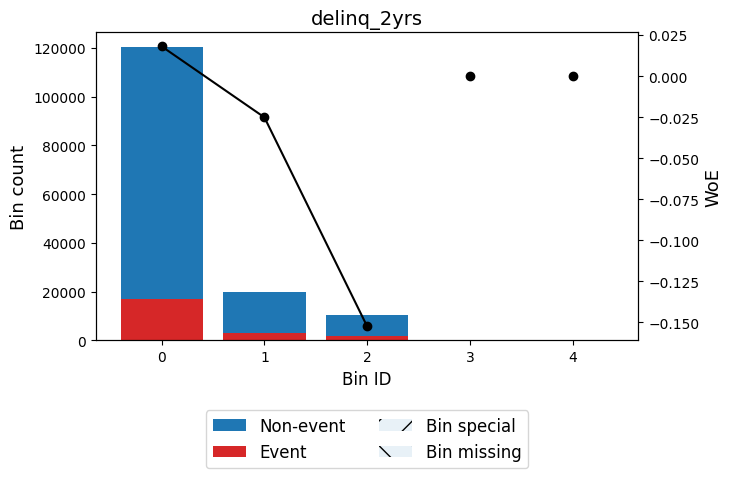


🔍 Feature: inq_last_6mths
✅ Total IV for inq_last_6mths: 0.0419
╒══════════════╤═════════╤════════════════════╤══════════════════════╤════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │         IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪════════════╡
│ (-inf, 0.50) │   88906 │             0.1245 │ 0.16305838756141222  │ 0.0148189  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [0.50, 1.50) │   39798 │             0.1561 │ -0.10018082844853149 │ 0.00275111 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [1.50, inf)  │   21730 │             0.1973 │ -0.3842652616656448  │ 0.0243698  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ Special      │       0 │             0      │ 0.0                  │ 0          │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ Missing  

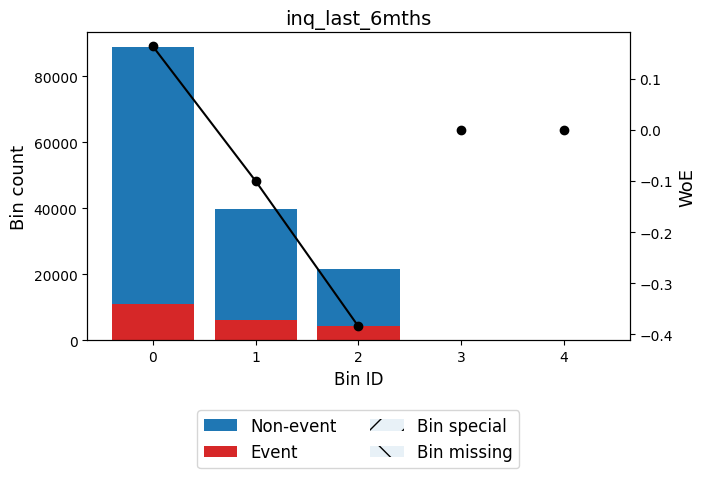


🔍 Feature: pub_rec
✅ Total IV for pub_rec: 0.0053
╒══════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │          IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 0.50) │  124969 │             0.1393 │ 0.03384551142591263  │ 0.000940171 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [0.50, inf)  │   25465 │             0.1635 │ -0.15533862686837763 │ 0.00431504  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ Special      │       0 │             0      │ 0.0                  │ 0           │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ Missing      │       0 │             0      │ 0.0                  │ 0           │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│             

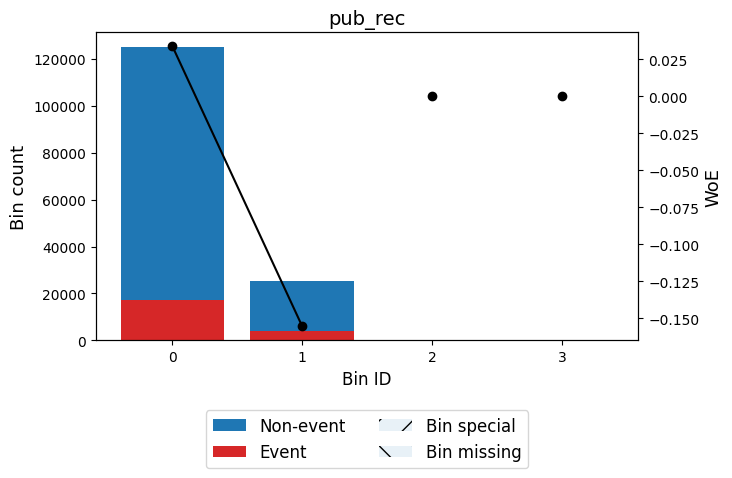


🔍 Feature: revol_util
✅ Total IV for revol_util: 0.0215
╒════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                   │          IV │
╞════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 13.95)  │    8853 │             0.1019 │ 0.38882196975305705   │ 0.00772827  │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [13.95, 27.15) │   15498 │             0.1129 │ 0.27366107496636216   │ 0.00698962  │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [27.15, 43.65) │   30321 │             0.1358 │ 0.06260883219173263   │ 0.000772573 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [43.65, 51.55) │   16883 │             0.1458 │ -0.019905046268130944 │ 4.47826e-05 │
├────────────────┼─────────┼────────────────────┼──────────────

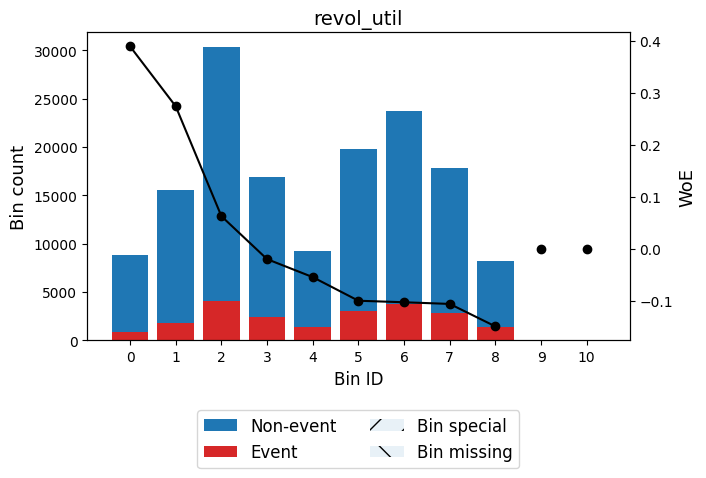


🔍 Feature: collections_12_mths_ex_med
✅ Total IV for collections_12_mths_ex_med: 0.0000
╒═════════════╤═════════╤════════════════════╤═══════╤══════╕
│ Bin         │   Count │   Default Rate (%) │ WOE   │   IV │
╞═════════════╪═════════╪════════════════════╪═══════╪══════╡
│ (-inf, inf) │  150434 │             0.1434 │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│ Special     │       0 │             0      │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│ Missing     │       0 │             0      │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│             │  150434 │             0.1434 │       │    0 │
╘═════════════╧═════════╧════════════════════╧═══════╧══════╛


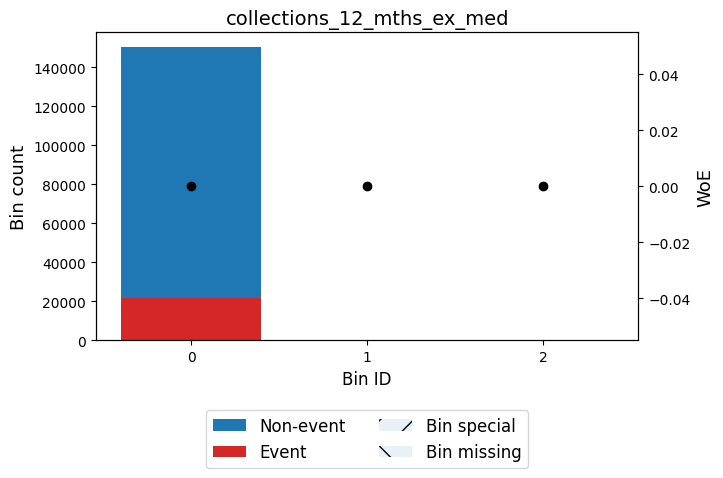


🔍 Feature: acc_now_delinq
✅ Total IV for acc_now_delinq: 0.0000
╒═════════════╤═════════╤════════════════════╤═══════╤══════╕
│ Bin         │   Count │   Default Rate (%) │ WOE   │   IV │
╞═════════════╪═════════╪════════════════════╪═══════╪══════╡
│ (-inf, inf) │  150434 │             0.1434 │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│ Special     │       0 │             0      │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│ Missing     │       0 │             0      │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│             │  150434 │             0.1434 │       │    0 │
╘═════════════╧═════════╧════════════════════╧═══════╧══════╛


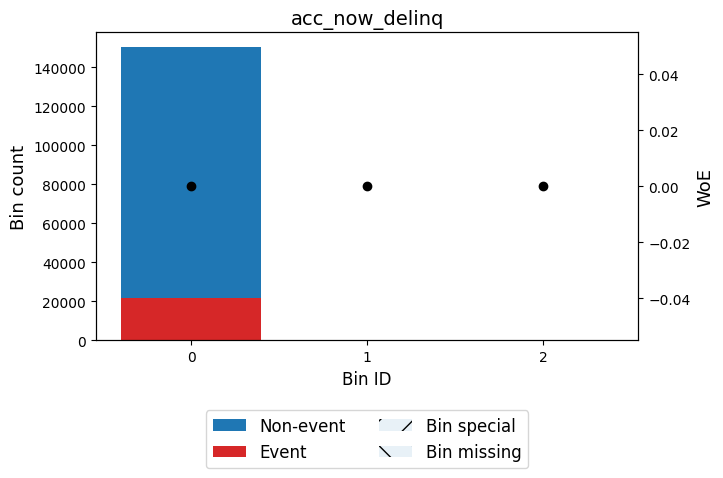


🔍 Feature: total_rev_hi_lim
✅ Total IV for total_rev_hi_lim: 0.0291
╒══════════════════════╤═════════╤════════════════════╤════════════════════════╤═════════════╕
│ Bin                  │   Count │   Default Rate (%) │ WOE                    │          IV │
╞══════════════════════╪═════════╪════════════════════╪════════════════════════╪═════════════╡
│ (-inf, 15710.00)     │   41320 │             0.1583 │ -0.11705602323680564   │ 0.00392287  │
├──────────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [15710.00, 27720.00) │   45824 │             0.1548 │ -0.09041813328243387   │ 0.00257151  │
├──────────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [27720.00, 30815.00) │    7628 │             0.1474 │ -0.03209287531179239   │ 5.28255e-05 │
├──────────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [30815.00, 37425.00) │   13386 │             0.1434 │ -0.00055554763930176

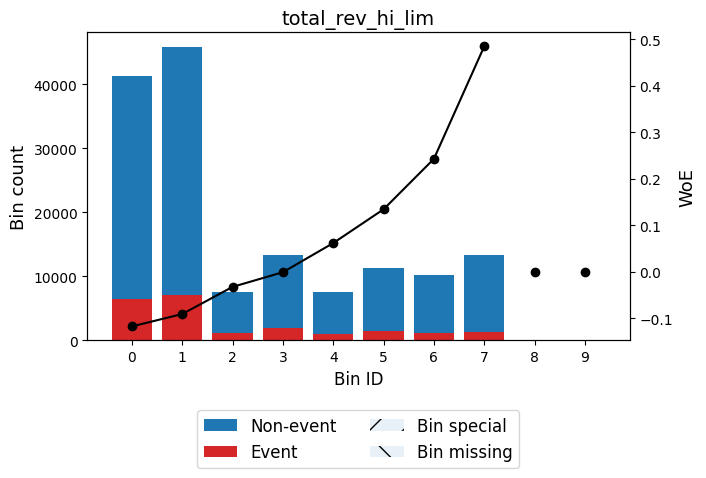


🔍 Feature: acc_open_past_24mths
✅ Total IV for acc_open_past_24mths: 0.0977
╒══════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │          IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 1.50) │   20222 │             0.0927 │ 0.49382889683289255  │ 0.0274013   │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [1.50, 2.50) │   19884 │             0.1052 │ 0.3535462049924001   │ 0.0145374   │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [2.50, 3.50) │   21892 │             0.1205 │ 0.20008128097484956  │ 0.00542087  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [3.50, 4.50) │   25096 │             0.14   │ 0.02781909840734076  │ 0.000127829 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼───

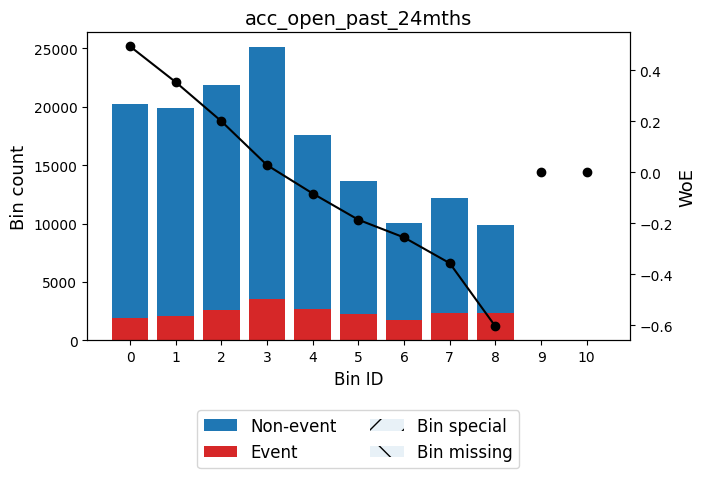


🔍 Feature: bc_open_to_buy
✅ Total IV for bc_open_to_buy: 0.0580
╒══════════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin                  │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 166.50)       │    8110 │             0.1826 │ -0.2888800681122099   │ 0.00497714  │
├──────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [166.50, 553.50)     │   11001 │             0.1723 │ -0.21853918673906136  │ 0.00377152  │
├──────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [553.50, 1119.50)    │   11226 │             0.1671 │ -0.1813820033692397   │ 0.00261722  │
├──────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [1119.50, 2347.50)   │   18140 │             0.1649 │ -0.16528975255742684  │ 0.0034923

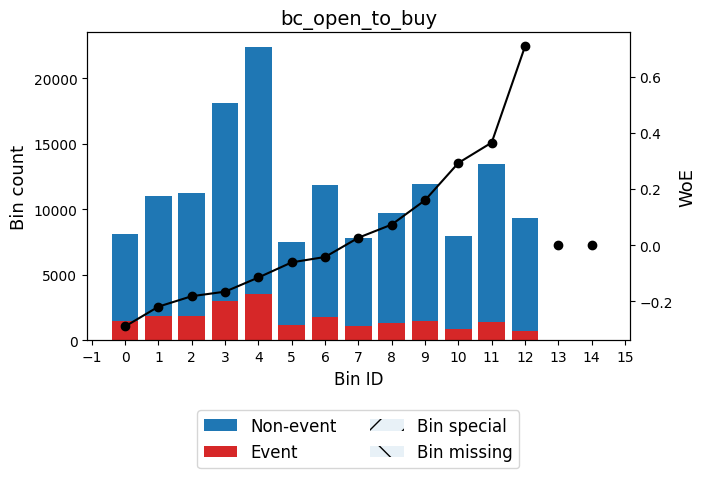


🔍 Feature: chargeoff_within_12_mths
✅ Total IV for chargeoff_within_12_mths: 0.0000
╒═════════════╤═════════╤════════════════════╤═══════╤══════╕
│ Bin         │   Count │   Default Rate (%) │ WOE   │   IV │
╞═════════════╪═════════╪════════════════════╪═══════╪══════╡
│ (-inf, inf) │  150434 │             0.1434 │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│ Special     │       0 │             0      │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│ Missing     │       0 │             0      │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│             │  150434 │             0.1434 │       │    0 │
╘═════════════╧═════════╧════════════════════╧═══════╧══════╛


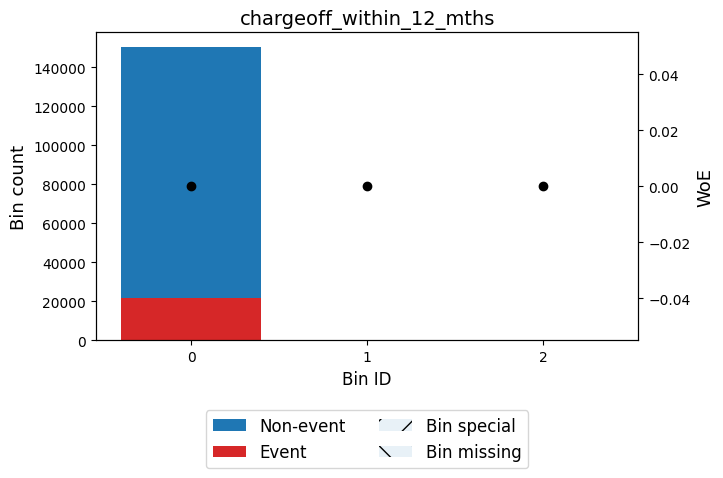


🔍 Feature: mo_sin_old_il_acct
✅ Total IV for mo_sin_old_il_acct: 0.0062
╒══════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin              │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 37.50)    │    8215 │             0.1636 │ -0.15595708213782133  │ 0.00140344  │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [37.50, 95.50)   │   23915 │             0.1527 │ -0.07441803326746244  │ 0.000903976 │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [95.50, 121.50)  │   22924 │             0.1477 │ -0.035250966311938914 │ 0.00019175  │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [121.50, 128.50) │   11854 │             0.1458 │ -0.019474792919949024 │ 3.00938e-05 │
├──────────────────┼───────

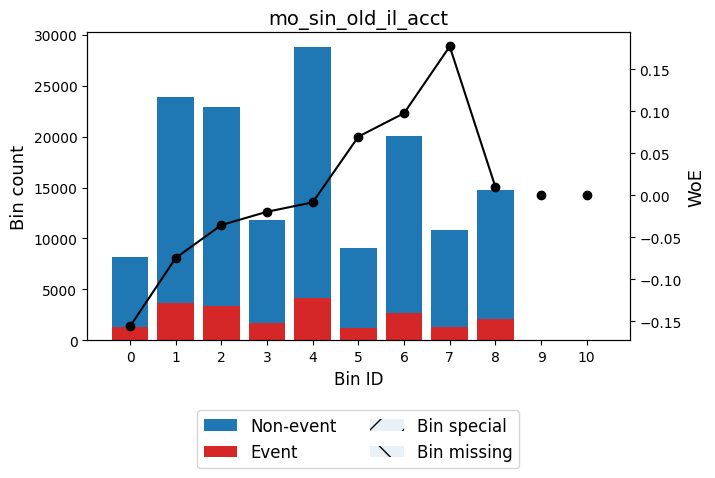


🔍 Feature: mo_sin_rcnt_rev_tl_op
✅ Total IV for mo_sin_rcnt_rev_tl_op: 0.0385
╒════════════════╤═════════╤════════════════════╤════════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                    │          IV │
╞════════════════╪═════════╪════════════════════╪════════════════════════╪═════════════╡
│ (-inf, 1.50)   │   11396 │             0.1834 │ -0.2941212086400653    │ 0.00726283  │
├────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [1.50, 3.50)   │   22219 │             0.1655 │ -0.16967526922014686   │ 0.00451458  │
├────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [3.50, 4.50)   │    9896 │             0.1589 │ -0.12082228156142949   │ 0.00100227  │
├────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [4.50, 7.50)   │   24061 │             0.1495 │ -0.048722502750810026  │ 0.000386324 │
├────────────────┼─────────┼───

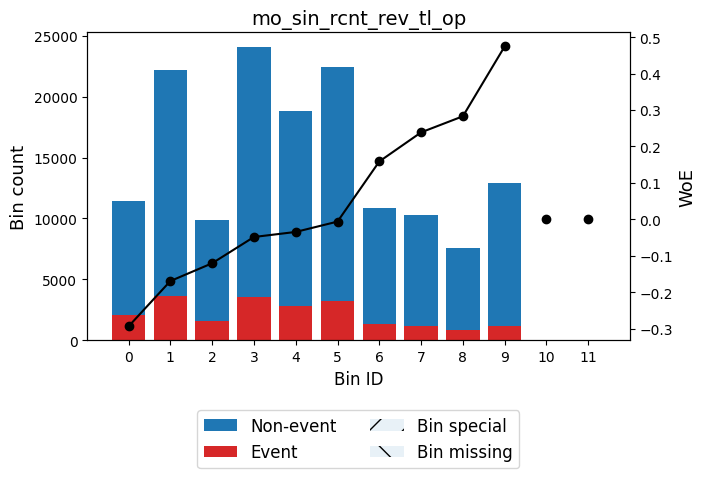


🔍 Feature: mo_sin_rcnt_tl
✅ Total IV for mo_sin_rcnt_tl: 0.0481
╒════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                   │          IV │
╞════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 1.50)   │   14201 │             0.1829 │ -0.29109472896880195  │ 0.00885605  │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [1.50, 3.50)   │   30749 │             0.1687 │ -0.19243318968834666  │ 0.00810002  │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [3.50, 4.50)   │   13535 │             0.1532 │ -0.07814563837857591  │ 0.000564898 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [4.50, 7.50)   │   37733 │             0.1443 │ -0.007618608299527763 │ 1.45984e-05 │
├────────────────┼─────────┼────────────────────┼──────

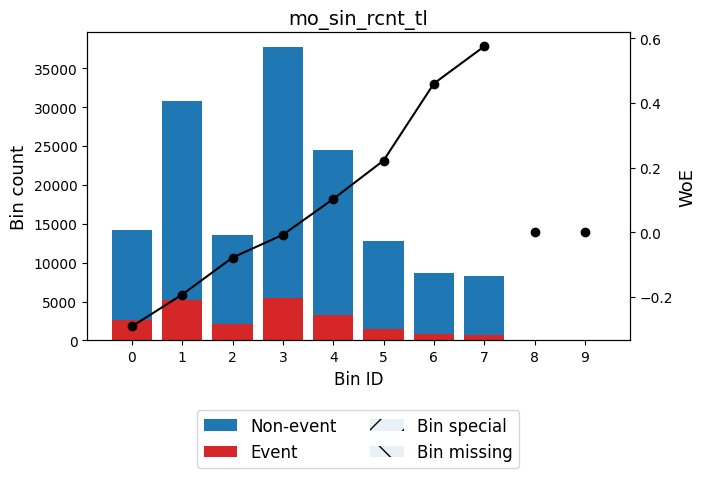


🔍 Feature: mort_acc
✅ Total IV for mort_acc: 0.0170
╒══════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 0.50) │   58521 │             0.1606 │ -0.13416627884332932  │ 0.00734282  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.50, 1.50) │   30224 │             0.1445 │ -0.008843723381193103 │ 1.57632e-05 │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [1.50, 2.50) │   21443 │             0.1349 │ 0.07055926697364368   │ 0.000691956 │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [2.50, 3.50) │   15792 │             0.1258 │ 0.1513642185725006    │ 0.00227782  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│

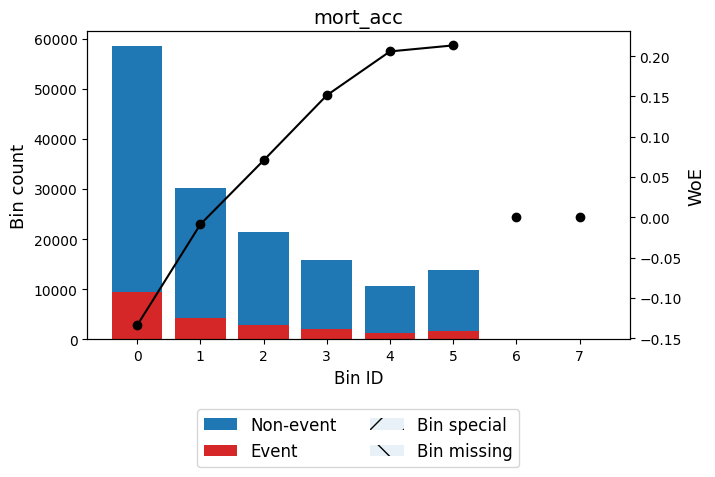


🔍 Feature: mths_since_recent_bc
✅ Total IV for mths_since_recent_bc: 0.0337
╒════════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                  │          IV │
╞════════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 3.50)   │   19358 │             0.178  │ -0.25775709263986935 │ 0.00935787  │
├────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [3.50, 5.50)   │   12983 │             0.1607 │ -0.1343773306696341  │ 0.00163427  │
├────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [5.50, 8.50)   │   16836 │             0.1571 │ -0.10767960054366488 │ 0.00134813  │
├────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [8.50, 13.50)  │   22328 │             0.1511 │ -0.06170048916157578 │ 0.000577568 │
├────────────────┼─────────┼────────────────────┼────

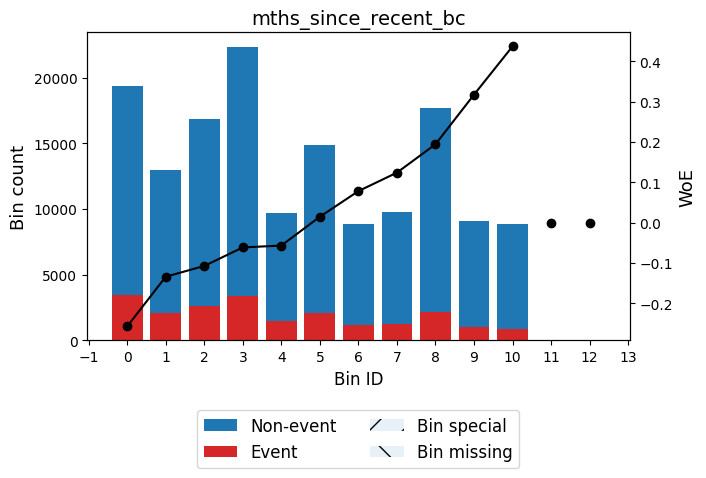


🔍 Feature: mths_since_recent_inq
✅ Total IV for mths_since_recent_inq: 0.0326
╒════════════════╤═════════╤════════════════════╤════════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                    │          IV │
╞════════════════╪═════════╪════════════════════╪════════════════════════╪═════════════╡
│ (-inf, 0.50)   │   11790 │             0.1815 │ -0.28146440976866827   │ 0.00685148  │
├────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [0.50, 1.50)   │   14475 │             0.1779 │ -0.2569276300840184    │ 0.00695043  │
├────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [1.50, 2.50)   │   11502 │             0.166  │ -0.17316237499360243   │ 0.00243705  │
├────────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [2.50, 3.50)   │   10493 │             0.1637 │ -0.15687055029593644   │ 0.00181425  │
├────────────────┼─────────┼───

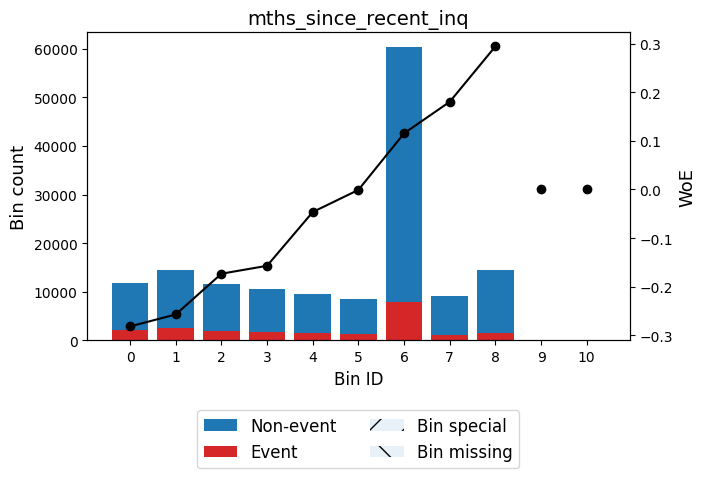


🔍 Feature: num_accts_ever_120_pd
✅ Total IV for num_accts_ever_120_pd: 0.0042
╒══════════════╤═════════╤════════════════════╤═════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                 │          IV │
╞══════════════╪═════════╪════════════════════╪═════════════════════╪═════════════╡
│ (-inf, 0.50) │  116458 │             0.1391 │ 0.0347606582466482  │ 0.000923858 │
├──────────────┼─────────┼────────────────────┼─────────────────────┼─────────────┤
│ [0.50, 1.50) │   18119 │             0.162  │ -0.1440817074982903 │ 0.00263102  │
├──────────────┼─────────┼────────────────────┼─────────────────────┼─────────────┤
│ [1.50, inf)  │   15857 │             0.1531 │ -0.0767814122951207 │ 0.000638596 │
├──────────────┼─────────┼────────────────────┼─────────────────────┼─────────────┤
│ Special      │       0 │             0      │ 0.0                 │ 0           │
├──────────────┼─────────┼────────────────────┼─────────────────────┼────────────

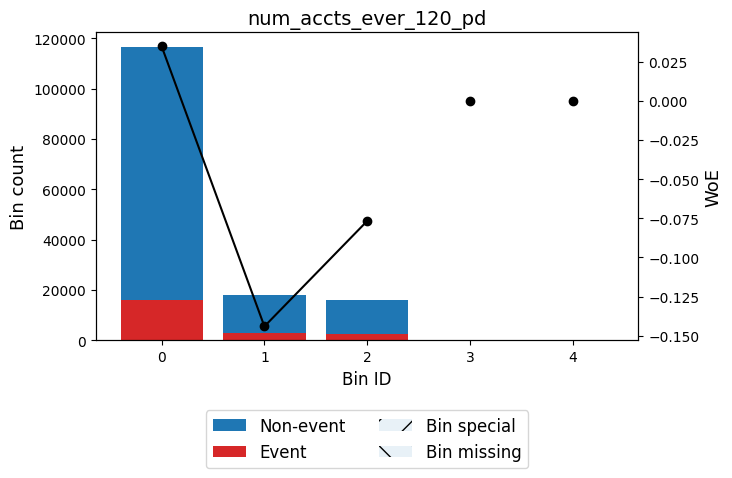


🔍 Feature: num_bc_tl
✅ Total IV for num_bc_tl: 0.0009
╒════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                   │          IV │
╞════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 3.50)   │   20557 │             0.1396 │ 0.030901380595324213  │ 0.000129055 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [3.50, 5.50)   │   28154 │             0.14   │ 0.027838684711675832  │ 0.000143606 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [5.50, 12.50)  │   79547 │             0.1432 │ 0.000949345957089287  │ 4.76409e-07 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [12.50, 14.50) │    8593 │             0.15   │ -0.053061076750185565 │ 0.000163887 │
├────────────────┼─────────┼────────────────────┼────────────────

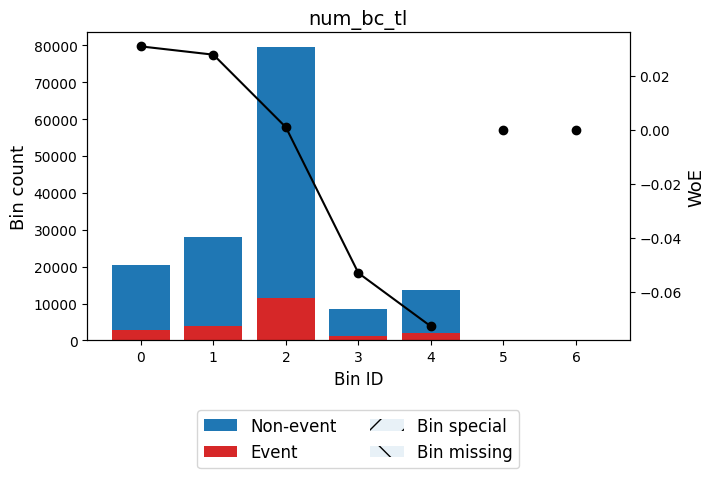


🔍 Feature: num_il_tl
✅ Total IV for num_il_tl: 0.0047
╒════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                   │          IV │
╞════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 1.50)   │   12339 │             0.1312 │ 0.1026859848613555    │ 0.00083362  │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [1.50, 2.50)   │   10927 │             0.1335 │ 0.08254992602528621   │ 0.00048056  │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [2.50, 3.50)   │   12232 │             0.1349 │ 0.07076266048364821   │ 0.000396971 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [3.50, 6.50)   │   35419 │             0.1396 │ 0.031350558200138545  │ 0.000228832 │
├────────────────┼─────────┼────────────────────┼────────────────

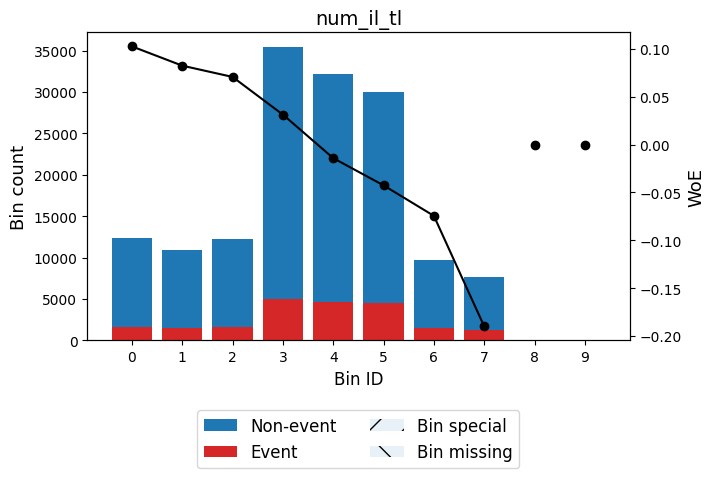


🔍 Feature: num_tl_120dpd_2m
✅ Total IV for num_tl_120dpd_2m: 0.0000
╒═════════════╤═════════╤════════════════════╤═══════╤══════╕
│ Bin         │   Count │   Default Rate (%) │ WOE   │   IV │
╞═════════════╪═════════╪════════════════════╪═══════╪══════╡
│ (-inf, inf) │  150434 │             0.1434 │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│ Special     │       0 │             0      │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│ Missing     │       0 │             0      │ 0.0   │    0 │
├─────────────┼─────────┼────────────────────┼───────┼──────┤
│             │  150434 │             0.1434 │       │    0 │
╘═════════════╧═════════╧════════════════════╧═══════╧══════╛


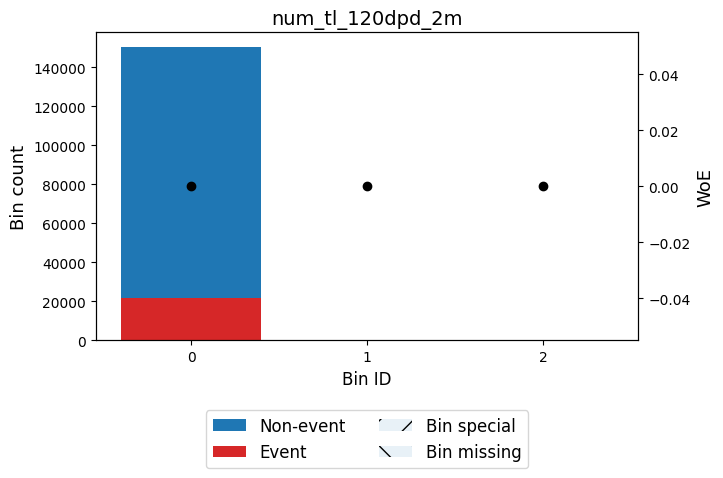


🔍 Feature: num_tl_90g_dpd_24m
✅ Total IV for num_tl_90g_dpd_24m: 0.0012
╒══════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │          IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 0.50) │  142041 │             0.1423 │ 0.008610075848125565 │ 6.97827e-05 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [0.50, inf)  │    8393 │             0.1612 │ -0.13833267510450242 │ 0.00112115  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ Special      │       0 │             0      │ 0.0                  │ 0           │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ Missing      │       0 │             0      │ 0.0                  │ 0           │
├──────────────┼─────────┼────────────────────┼──────────────────────┼───────

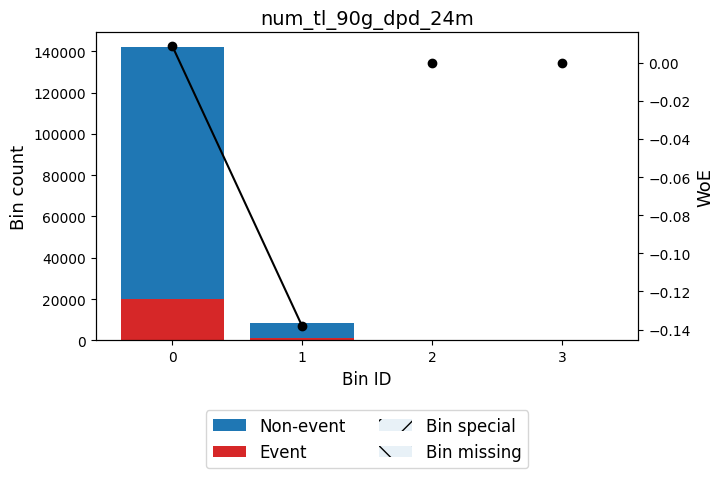


🔍 Feature: num_tl_op_past_12m
✅ Total IV for num_tl_op_past_12m: 0.0775
╒══════════════╤═════════╤════════════════════╤══════════════════════╤════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │         IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪════════════╡
│ (-inf, 0.50) │   25672 │             0.1    │ 0.40969464634742403  │ 0.0246919  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [0.50, 1.50) │   36743 │             0.1189 │ 0.21546478549129544  │ 0.0104924  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [1.50, 2.50) │   39049 │             0.1405 │ 0.023820474194826913 │ 0.00014604 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [2.50, 3.50) │   22970 │             0.1684 │ -0.19087188210118056 │ 0.00594983 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [

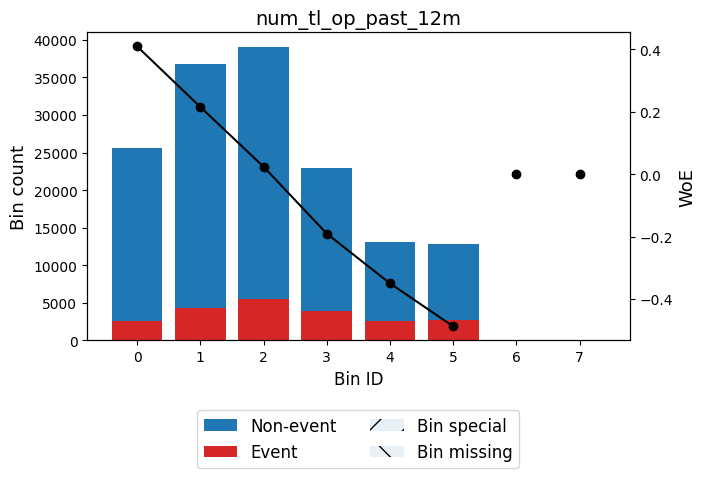


🔍 Feature: pct_tl_nvr_dlq
✅ Total IV for pct_tl_nvr_dlq: 0.0002
╒═══════════════╤═════════╤════════════════════╤════════════════════════╤═════════════╕
│ Bin           │   Count │   Default Rate (%) │ WOE                    │          IV │
╞═══════════════╪═════════╪════════════════════╪════════════════════════╪═════════════╡
│ (-inf, 77.90) │    9436 │             0.1363 │ 0.05886480535154126    │ 0.000212818 │
├───────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ [77.90, inf)  │  140998 │             0.1438 │ -0.0038520200016249895 │ 1.39265e-05 │
├───────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ Special       │       0 │             0      │ 0.0                    │ 0           │
├───────────────┼─────────┼────────────────────┼────────────────────────┼─────────────┤
│ Missing       │       0 │             0      │ 0.0                    │ 0           │
├───────────────┼─────────┼────────────────────┼───────

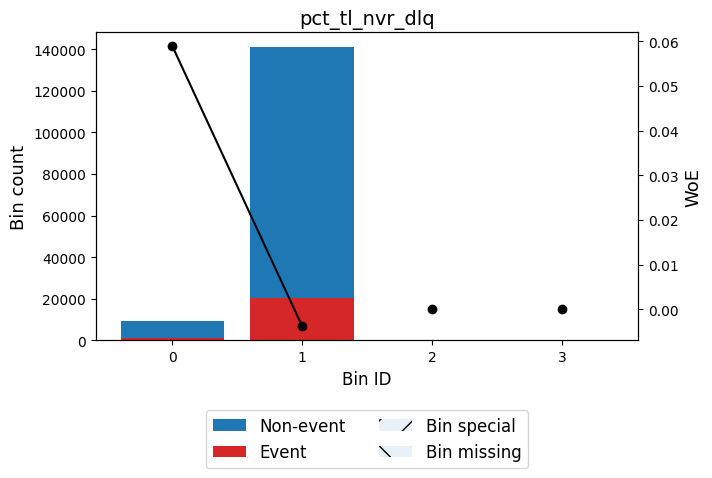


🔍 Feature: tot_hi_cred_lim
✅ Total IV for tot_hi_cred_lim: 0.0361
╒════════════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin                    │   Count │   Default Rate (%) │ WOE                   │          IV │
╞════════════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 21568.50)       │    8602 │             0.1445 │ -0.009220254669914496 │ 4.87716e-06 │
├────────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [21568.50, 36566.50)   │   13431 │             0.1592 │ -0.12330424394712258  │ 0.00141799  │
├────────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [36566.50, 48514.00)   │   11775 │             0.1727 │ -0.22068259534766121  │ 0.0041195   │
├────────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [48514.00, 69678.00)   │   17362 │             0.1653 │ -0.16833175

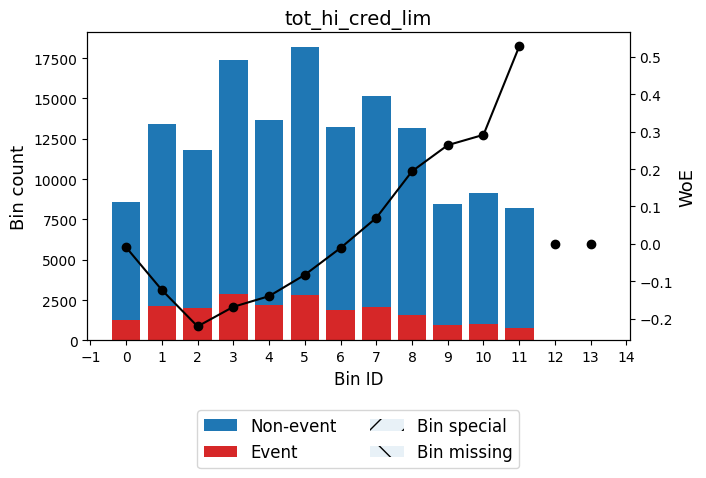


🔍 Feature: total_bal_ex_mort
✅ Total IV for total_bal_ex_mort: 0.0060
╒═══════════════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin                   │   Count │   Default Rate (%) │ WOE                  │          IV │
╞═══════════════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 8434.00)       │    9082 │             0.1178 │ 0.22566527324395436  │ 0.00283431  │
├───────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [8434.00, 12965.50)   │    8425 │             0.1334 │ 0.08350107751664693  │ 0.000378982 │
├───────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [12965.50, 21739.50)  │   19195 │             0.1369 │ 0.05357316824823388  │ 0.000359265 │
├───────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [21739.50, 29885.50)  │   18673 │             0.1476 │ -0.03400912878949747 │ 0.0

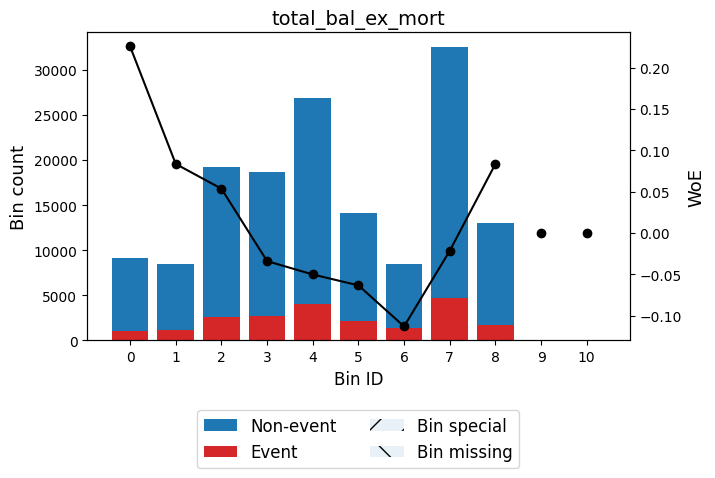


🔍 Feature: credit_history_years
✅ Total IV for credit_history_years: 0.0110
╒════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                   │          IV │
╞════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 6.54)   │    7869 │             0.1489 │ -0.044668522312710124 │ 0.000106042 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [6.54, 9.12)   │   11122 │             0.1541 │ -0.08488592510511928  │ 0.000549022 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [9.12, 10.62)  │   11071 │             0.1608 │ -0.13518367073062088  │ 0.00141076  │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [10.62, 11.46) │    8111 │             0.1703 │ -0.20384922685632123  │ 0.00240718  │
├────────────────┼─────────┼───────────────

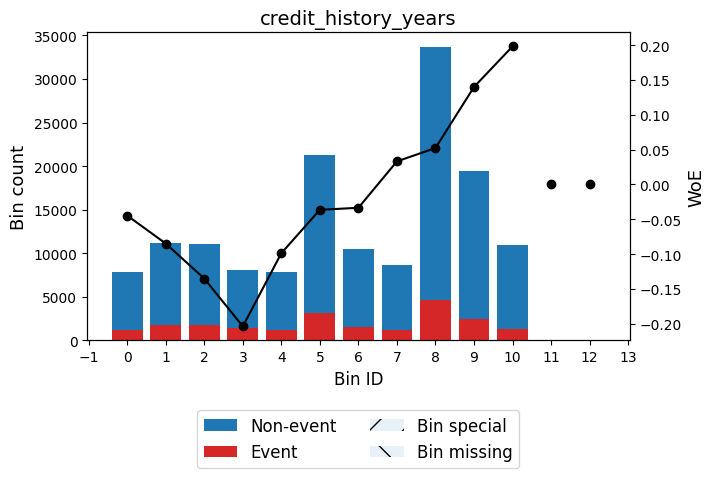


🔍 Feature: fico_score
✅ Total IV for fico_score: 0.1148
╒══════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin              │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 664.50)   │   13394 │             0.1899 │ -0.3371890615772095   │ 0.0113844   │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [664.50, 669.50) │   13025 │             0.1826 │ -0.2885981320219235   │ 0.00797714  │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [669.50, 674.50) │   13260 │             0.181  │ -0.27799891893391293  │ 0.00750825  │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [674.50, 684.50) │   23492 │             0.1679 │ -0.18693895341828304  │ 0.00582889  │
├──────────────────┼─────────┼─────────────

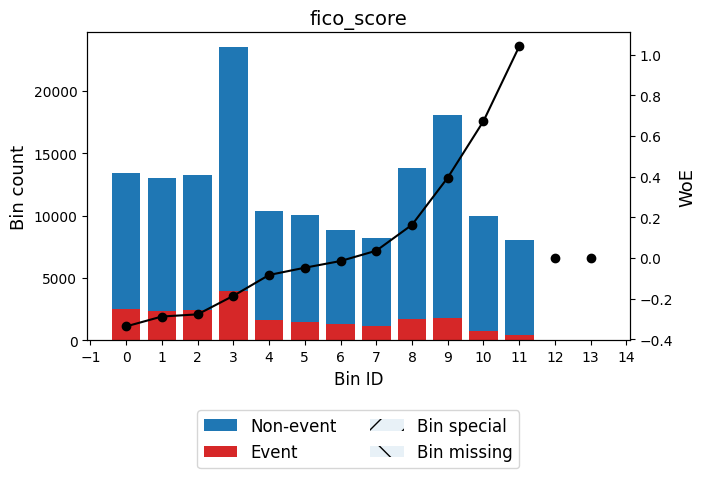


🔍 Feature: proportion_satisfac_accounts
✅ Total IV for proportion_satisfac_accounts: 0.0095
╒══════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 0.84) │   15613 │             0.1194 │ 0.21062488184589467   │ 0.0042679   │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.84, 0.86) │    9822 │             0.1252 │ 0.15620087229638036   │ 0.00150606  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.86, 0.88) │   11060 │             0.1362 │ 0.05988628950426578   │ 0.000258083 │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.88, 0.89) │   12313 │             0.1377 │ 0.04725143724326353   │ 0.000179685 │
├──────────────┼─────────┼────────────────────┼

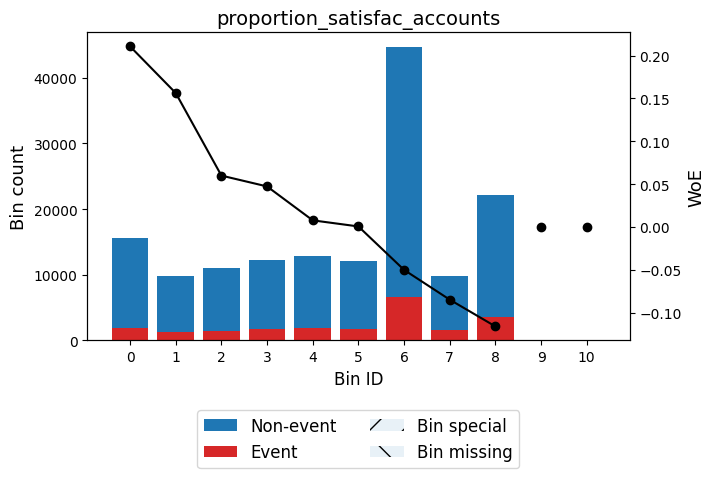


🔍 Feature: proportion_satisfac_bc_tl
✅ Total IV for proportion_satisfac_bc_tl: 0.0072
╒══════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 0.74) │   25650 │             0.1414 │ 0.016065005410186073  │ 4.37535e-05 │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.74, 0.79) │   16187 │             0.143  │ 0.0033503802413010764 │ 1.2064e-06  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.79, 0.82) │   12467 │             0.1488 │ -0.043515755869707684 │ 0.000159379 │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.82, 0.85) │    7838 │             0.1562 │ -0.10055206561633567  │ 0.000545911 │
├──────────────┼─────────┼────────────────────┼──────

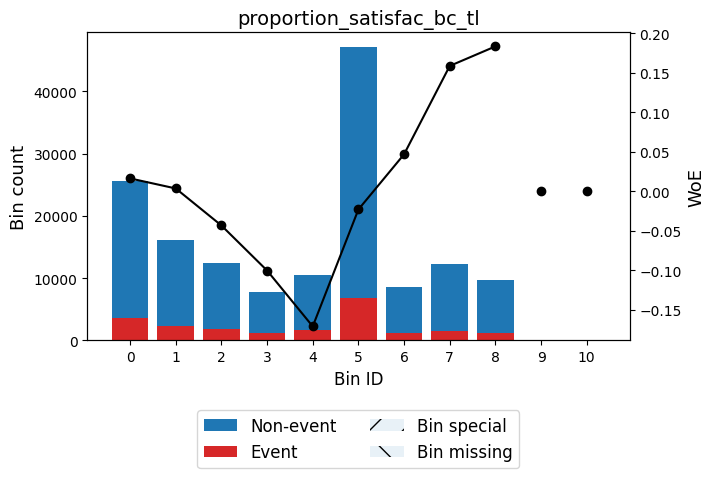


🔍 Feature: fico_score/delinq_2yrs
✅ Total IV for fico_score/delinq_2yrs: 0.0978
╒══════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin              │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 679.50)   │   66647 │             0.1699 │ -0.20103294339671574  │ 0.0192179   │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [679.50, 684.50) │    8809 │             0.1673 │ -0.18293887825800237  │ 0.00209026  │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [684.50, 689.50) │    8093 │             0.1585 │ -0.1184254615578808   │ 0.000786801 │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [689.50, 699.50) │   15144 │             0.1475 │ -0.033407991874260246 │ 0.0001137   │
├──────────────────

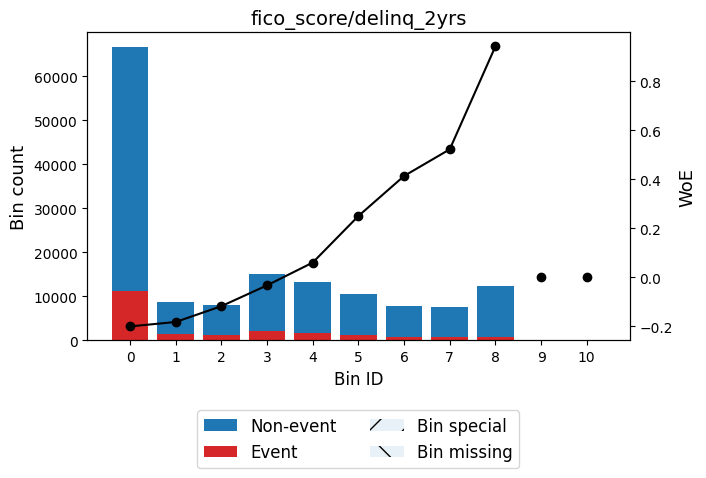


🔍 Feature: fico_score/acc_now_delinq
✅ Total IV for fico_score/acc_now_delinq: 0.1146
╒══════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin              │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 664.50)   │   14034 │             0.1888 │ -0.3295020068600323   │ 0.0113611   │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [664.50, 669.50) │   12879 │             0.183  │ -0.2915378167311813   │ 0.00805731  │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [669.50, 674.50) │   13136 │             0.1807 │ -0.2761713812060509   │ 0.00733597  │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [674.50, 684.50) │   23347 │             0.1678 │ -0.18643102034717574  │ 0.00576046  │
├────────────

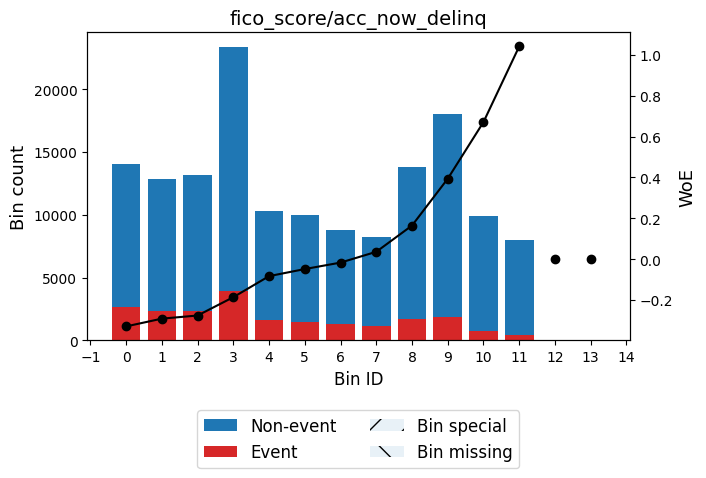


🔍 Feature: fico_score/inq_last_6mths
✅ Total IV for fico_score/inq_last_6mths: 0.1262
╒══════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin              │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 221.50)   │    9027 │             0.2223 │ -0.5354943478622838   │ 0.0206616   │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [221.50, 233.17) │    8216 │             0.2034 │ -0.4223373463371958   │ 0.0112725   │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [233.17, 339.75) │   19290 │             0.1731 │ -0.22376633385700906  │ 0.00694595  │
├──────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [339.75, 349.75) │   10987 │             0.1684 │ -0.1904700311595524   │ 0.00283355  │
├────────────

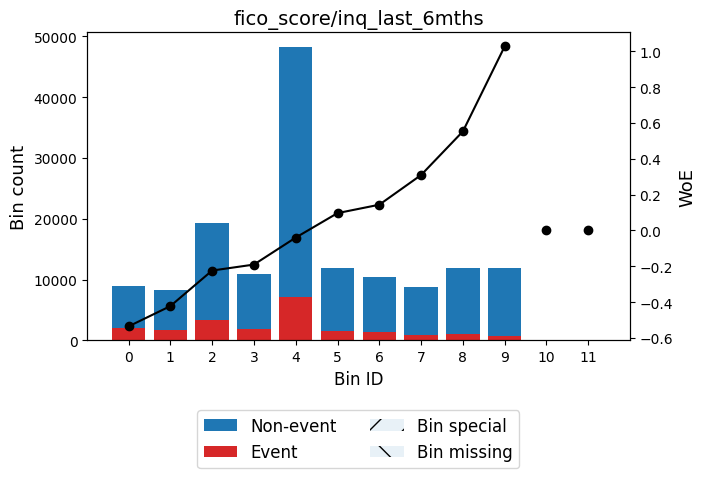


🔍 Feature: delinq_2yrs/credit_hist
✅ Total IV for delinq_2yrs/credit_hist: 0.0037
╒══════════════╤═════════╤════════════════════╤══════════════════════╤════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │         IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪════════════╡
│ (-inf, 0.02) │  120500 │             0.1412 │ 0.017851747166060417 │ 0.00025365 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [0.02, 0.07) │   13204 │             0.1368 │ 0.054706950332211735 │ 0.0002576  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [0.07, 0.11) │    8768 │             0.1601 │ -0.13033853831859044 │ 0.00103688 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [0.11, inf)  │    7962 │             0.1688 │ -0.1934735286873399  │ 0.00212089 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼───────

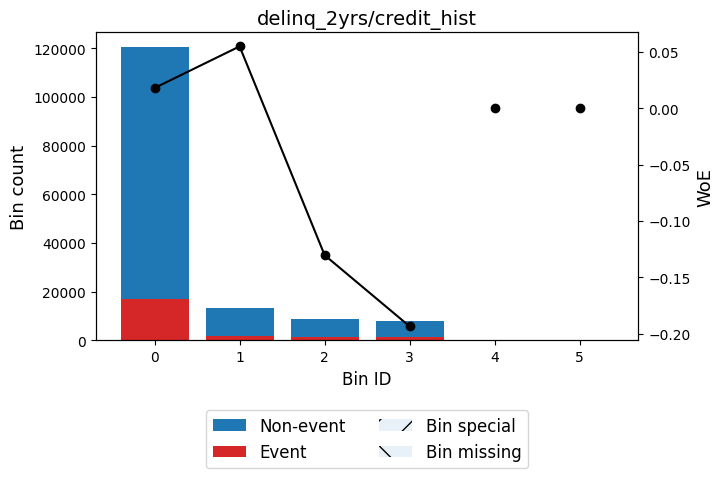


🔍 Feature: inq_last6mths_x_tl_op_past_12m
✅ Total IV for inq_last6mths_x_tl_op_past_12m: 0.0600
╒══════════════╤═════════╤════════════════════╤══════════════════════╤════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │         IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪════════════╡
│ (-inf, 0.50) │   93972 │             0.1247 │ 0.16136192436155583  │ 0.0153485  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [0.50, 1.50) │    8677 │             0.1249 │ 0.15895237112783978  │ 0.00137641 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [1.50, 2.50) │   13387 │             0.1498 │ -0.05181388732579362 │ 0.00024335 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [2.50, 4.50) │   16460 │             0.1768 │ -0.24938302994349382 │ 0.00742692 │
├──────────────┼─────────┼────────────────────┼────────────────

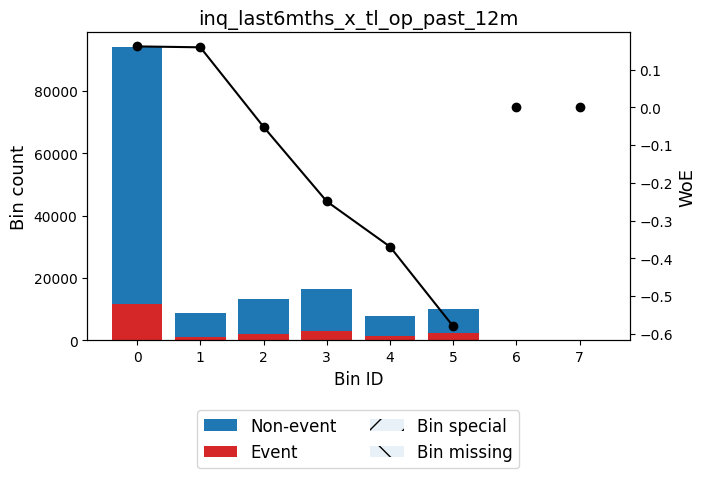


🔍 Feature: late_pymt_hist
✅ Total IV for late_pymt_hist: 0.0052
╒══════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │          IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 0.05) │  122206 │             0.1391 │ 0.035227156877426946 │ 0.000995486 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [0.05, 0.13) │   17950 │             0.1593 │ -0.12398986978956383 │ 0.00191669  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [0.13, inf)  │   10278 │             0.1664 │ -0.17607553345492333 │ 0.00225388  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ Special      │       0 │             0      │ 0.0                  │ 0           │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤


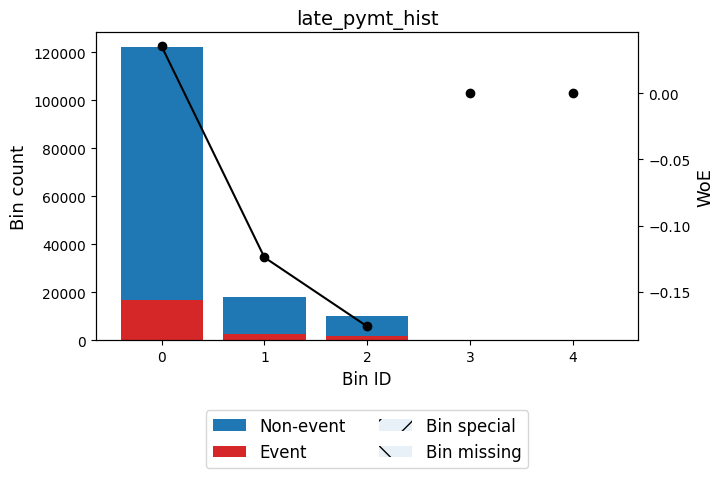


🔍 Feature: dti_x_revol_util
✅ Total IV for dti_x_revol_util: 0.0625
╒════════════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin                │   Count │   Default Rate (%) │ WOE                  │          IV │
╞════════════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 163.50)     │   11426 │             0.0956 │ 0.45981205645647716  │ 0.0135913   │
├────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [163.50, 282.09)   │    9338 │             0.1022 │ 0.38580023902673455  │ 0.00803432  │
├────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [282.09, 428.49)   │   12870 │             0.1085 │ 0.3180528724563785   │ 0.00771434  │
├────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [428.49, 545.49)   │   10755 │             0.118  │ 0.22397134263733687  │ 0.00330825  │
├────────────────────

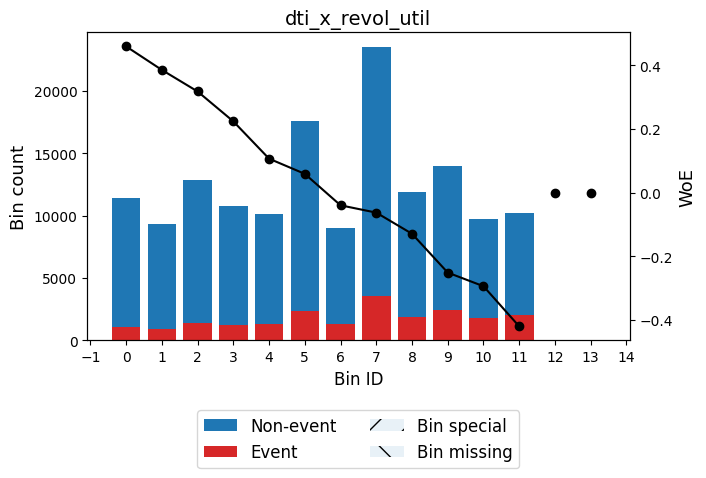


🔍 Feature: loan_amnt/annual_inc
✅ Total IV for loan_amnt/annual_inc: 0.1019
╒══════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 0.05) │    7618 │             0.0891 │ 0.53667532725505      │ 0.0120016   │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.05, 0.10) │   16041 │             0.0973 │ 0.4398252493384729    │ 0.0175863   │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.10, 0.13) │   14114 │             0.1094 │ 0.309320074913769     │ 0.00802734  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.13, 0.15) │    9896 │             0.1135 │ 0.2680586513041381    │ 0.00429099  │
├──────────────┼─────────┼────────────────────┼────────────────

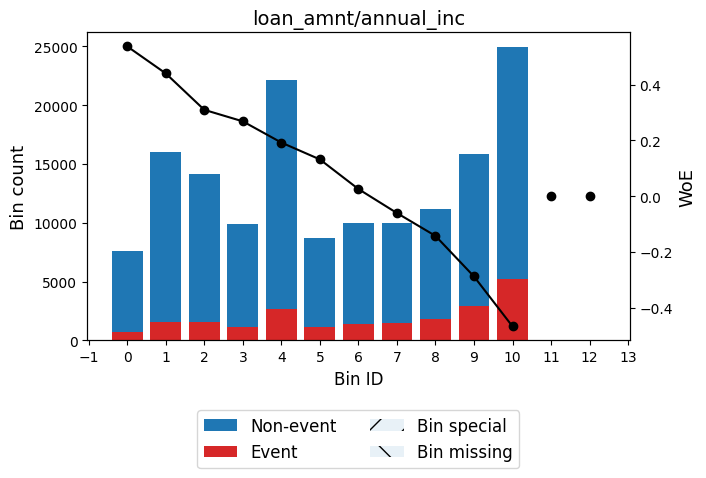


🔍 Feature: revol_util/annual_inc
✅ Total IV for revol_util/annual_inc: 0.0504
╒══════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 0.00) │    8138 │             0.0946 │ 0.4708945670016109    │ 0.0101113   │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.00, 0.00) │   13787 │             0.102  │ 0.38779774996427907   │ 0.0119766   │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.00, 0.00) │    7537 │             0.118  │ 0.2243576049355771    │ 0.00232607  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.00, 0.00) │   15488 │             0.1189 │ 0.21497800447431414   │ 0.00440358  │
├──────────────┼─────────┼────────────────────┼──────────────

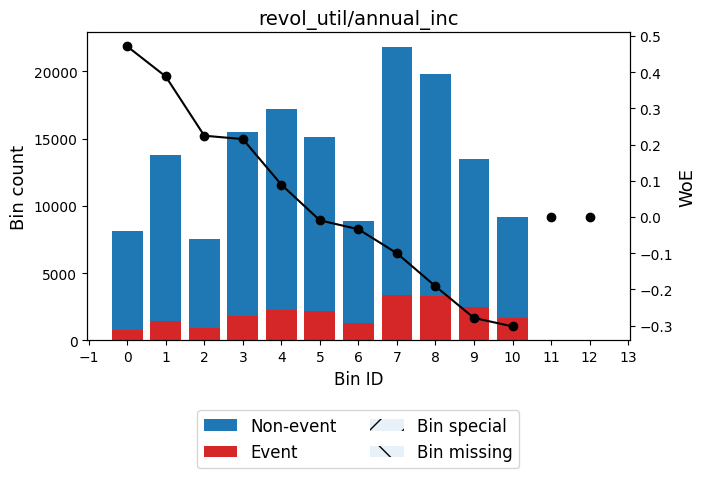


🔍 Feature: bc_open_to_buy/annual_inc
✅ Total IV for bc_open_to_buy/annual_inc: 0.0305
╒══════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 0.00) │    8895 │             0.1799 │ -0.2704309433567893   │ 0.00475381  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.00, 0.01) │   13767 │             0.1645 │ -0.16214178551286595  │ 0.00254767  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.01, 0.04) │   32089 │             0.1582 │ -0.11582181432714878  │ 0.00298129  │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.04, 0.06) │   10680 │             0.1542 │ -0.08568740911359951  │ 0.000537358 │
├──────────────┼─────────┼────────────────────┼──────

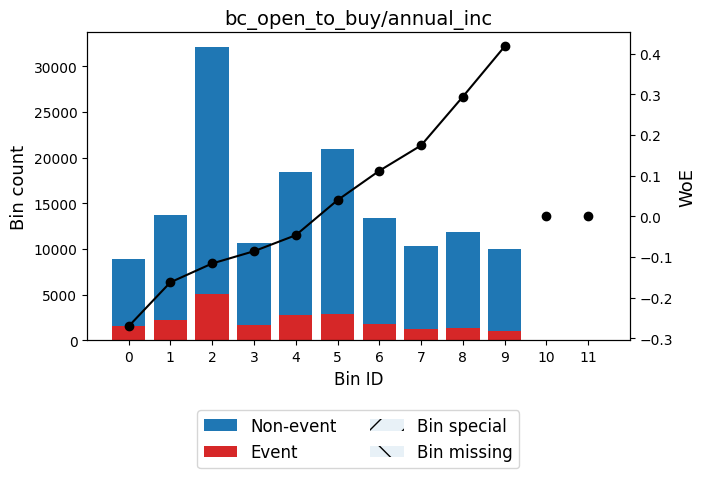


🔍 Feature: tl_op12m_x_inq6m
✅ Total IV for tl_op12m_x_inq6m: 0.0600
╒══════════════╤═════════╤════════════════════╤══════════════════════╤════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │         IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪════════════╡
│ (-inf, 0.50) │   93972 │             0.1247 │ 0.16136192436155583  │ 0.0153485  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [0.50, 1.50) │    8677 │             0.1249 │ 0.15895237112783978  │ 0.00137641 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [1.50, 2.50) │   13387 │             0.1498 │ -0.05181388732579362 │ 0.00024335 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [2.50, 4.50) │   16460 │             0.1768 │ -0.24938302994349382 │ 0.00742692 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [4.50

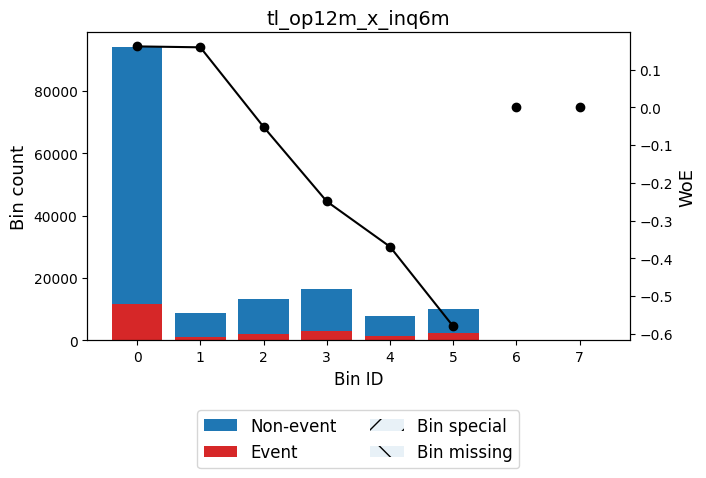


🔍 Feature: dti_x_inq
✅ Total IV for dti_x_inq: 0.0661
╒════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin            │   Count │   Default Rate (%) │ WOE                   │          IV │
╞════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 10.49)  │   97262 │             0.1235 │ 0.17187552296409714   │ 0.0179549   │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [10.49, 14.73) │    7534 │             0.135  │ 0.06994053419801793   │ 0.000238927 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [14.73, 18.87) │    8144 │             0.1492 │ -0.046645070233070074 │ 0.000119759 │
├────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [18.87, 24.51) │   10207 │             0.1625 │ -0.14813416983720873  │ 0.00156891  │
├────────────────┼─────────┼────────────────────┼────────────────

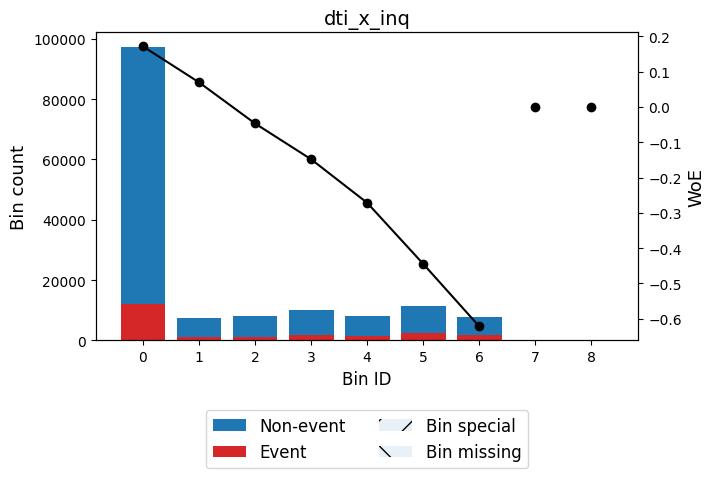


🔍 Feature: dti/fico_ratio
✅ Total IV for dti/fico_ratio: 0.0770
╒══════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │          IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 0.01) │   12359 │             0.0918 │ 0.5038051957809913   │ 0.0173666   │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [0.01, 0.01) │   12121 │             0.1049 │ 0.35674459169334893  │ 0.00901233  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [0.01, 0.02) │   10220 │             0.1134 │ 0.26880542879650626  │ 0.00445499  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [0.02, 0.02) │   12770 │             0.1159 │ 0.2442587942997445   │ 0.00463758  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤


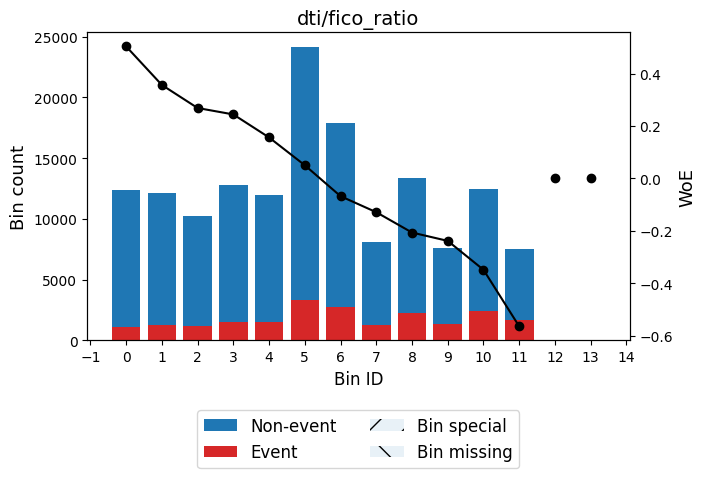


🔍 Feature: loan_amnt/tot_hi_cred_lim
✅ Total IV for loan_amnt/tot_hi_cred_lim: 0.0675
╒══════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ (-inf, 0.02) │    7750 │             0.0876 │ 0.5555195679597422    │ 0.0129921   │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.02, 0.04) │   11331 │             0.0973 │ 0.43947882107177216   │ 0.0124046   │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.04, 0.04) │    7594 │             0.103  │ 0.3769698051514654    │ 0.0062583   │
├──────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ [0.04, 0.06) │   14162 │             0.1122 │ 0.2808302739706625    │ 0.00670857  │
├──────────────┼─────────┼────────────────────┼──────

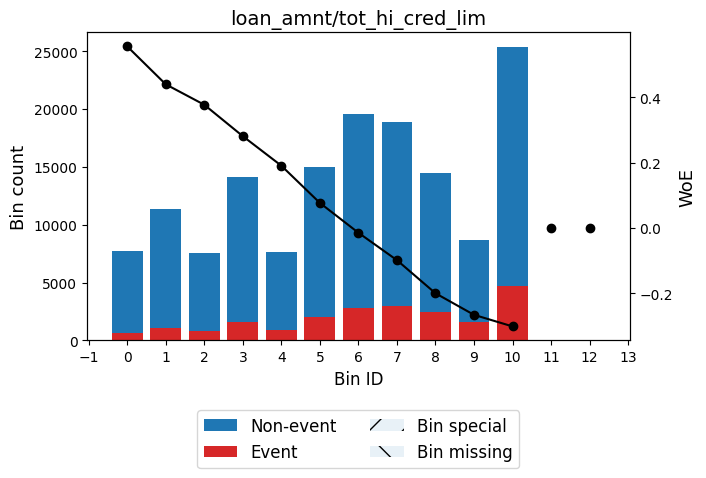


🔍 Feature: dti_x_term
✅ Total IV for dti_x_term: 0.1218
╒════════════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin                │   Count │   Default Rate (%) │ WOE                  │          IV │
╞════════════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 267.72)     │   12528 │             0.0876 │ 0.5551346386335778   │ 0.0209758   │
├────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [267.72, 349.86)   │    8511 │             0.0971 │ 0.4428143863659155   │ 0.00944783  │
├────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [349.86, 534.42)   │   25154 │             0.1042 │ 0.36423446588316644  │ 0.019443    │
├────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [534.42, 615.42)   │   12302 │             0.1184 │ 0.22048690255857206  │ 0.00367193  │
├────────────────────┼─────────┼─

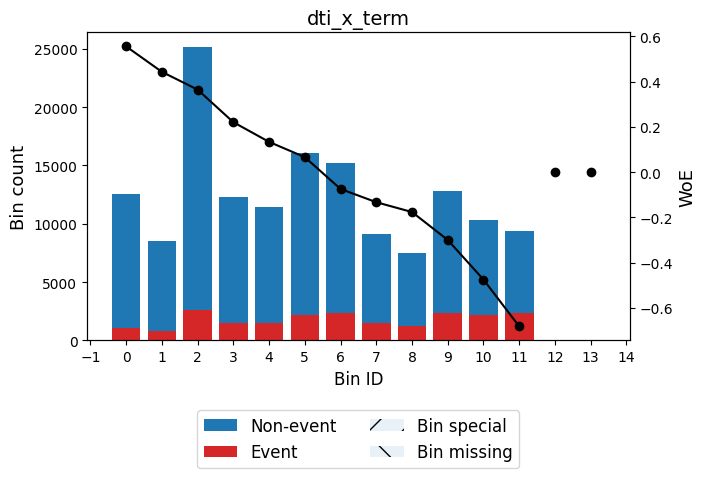

✅ Total IV for grade_numeric: 0.4118
╒══════════════╤═════════╤════════════════════╤══════════════════════╤════════════╕
│ Bin          │   Count │   Default Rate (%) │ WOE                  │         IV │
╞══════════════╪═════════╪════════════════════╪══════════════════════╪════════════╡
│ (-inf, 1.50) │   25350 │             0.0447 │ 1.274569387746693    │ 0.172562   │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [1.50, 2.50) │   44864 │             0.0944 │ 0.47322156025229223  │ 0.0562469  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [2.50, 3.50) │   44177 │             0.1563 │ -0.10127656314866784 │ 0.00312219 │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [3.50, 4.50) │   21737 │             0.2222 │ -0.5350013931513362  │ 0.0496535  │
├──────────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ [4.50, inf)  │   14306 │             

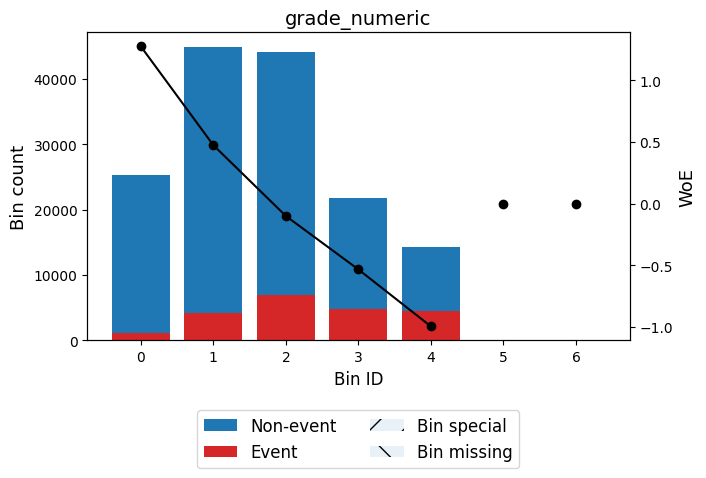

In [59]:
# ========================================== Train - Test Split ==========================================
numerical_cols = get_numerical_cols(df, TARGET_COL)
sampled_df = df.sample(fraction=0.1, seed=42, withReplacement=False).toPandas()
train_df , test_df = oot_train_test_split_pandas(initial_df=sampled_df, date_cut_off='2017-08-01')


# == Observe IV of Numerical Variables == 
for feature in numerical_cols:
    if feature == "id":
        continue

    print(f"\n🔍 Feature: {feature}")

    if train_df[feature].nunique() < 2:
        print("⚠️ Not enough variation. Skipping.")
        iv_categories["no_variation"].append(feature)
        continue

    x, y = train_df[feature], train_df[TARGET_COL]
    first_bin_and_classify_feature(feature=feature, x=x, y=y, monotonic_trend_type='auto')

    
train_df = tx_grade(train_df)

first_bin_and_classify_feature('grade_numeric', train_df['grade_numeric'], train_df[TARGET_COL], dtype='numerical',monotonic_trend_type='auto' )


✅ Total IV for home_ownership: 0.0200
╒══════════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin                  │   Count │   Default Rate (%) │ WOE                   │          IV │
╞══════════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ ['MORTGAGE' 'OTHER'] │   74993 │             0.1267 │ 0.14267342491498147   │ 0.00964066  │
├──────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ ['OWN']              │   16168 │             0.1455 │ -0.017552647455648218 │ 3.33205e-05 │
├──────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ ['RENT']             │   59273 │             0.1638 │ -0.157651348626223    │ 0.0103535   │
├──────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ Special              │       0 │             0      │ 0.0                   │ 0           │
├─────────────────────

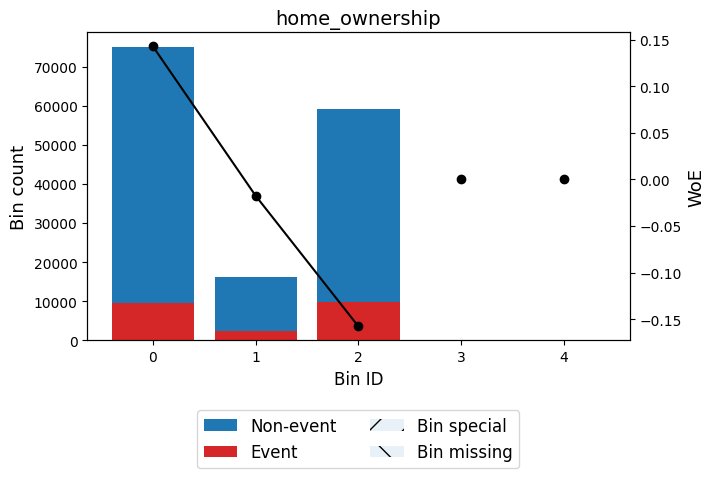

✅ Total IV for verification_status: 0.0584
╒═════════════════════╤═════════╤════════════════════╤═══════════════════════╤═════════════╕
│ Bin                 │   Count │   Default Rate (%) │ WOE                   │          IV │
╞═════════════════════╪═════════╪════════════════════╪═══════════════════════╪═════════════╡
│ ['Not Verified']    │   44866 │             0.1039 │ 0.36690545646312556   │ 0.0351558   │
├─────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ ['Source Verified'] │   59484 │             0.1458 │ -0.019448393122808882 │ 0.000150602 │
├─────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ ['Verified']        │   46084 │             0.1787 │ -0.26225743955005765  │ 0.0230979   │
├─────────────────────┼─────────┼────────────────────┼───────────────────────┼─────────────┤
│ Special             │       0 │             0      │ 0.0                   │ 0           │
├─────────────────────┼────

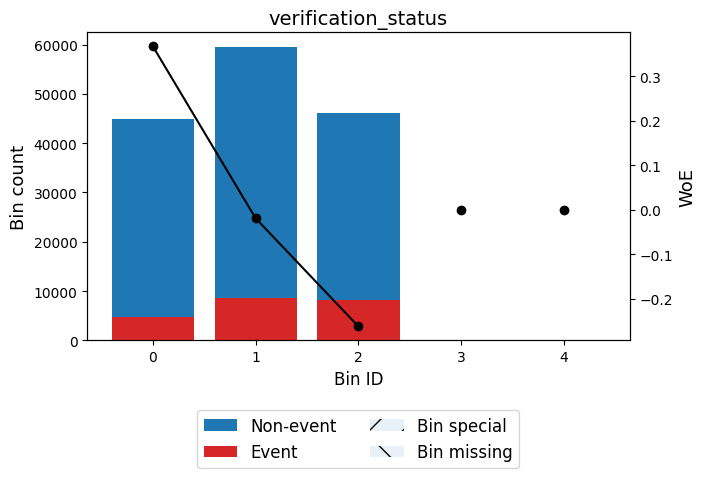

✅ Total IV for pymnt_plan: 0.0000
╒═════════╤═════════╤════════════════════╤═══════╤══════╕
│ Bin     │   Count │   Default Rate (%) │ WOE   │   IV │
╞═════════╪═════════╪════════════════════╪═══════╪══════╡
│ ['n']   │  150434 │             0.1434 │ 0.0   │    0 │
├─────────┼─────────┼────────────────────┼───────┼──────┤
│ Special │       0 │             0      │ 0.0   │    0 │
├─────────┼─────────┼────────────────────┼───────┼──────┤
│ Missing │       0 │             0      │ 0.0   │    0 │
├─────────┼─────────┼────────────────────┼───────┼──────┤
│         │  150434 │             0.1434 │       │    0 │
╘═════════╧═════════╧════════════════════╧═══════╧══════╛


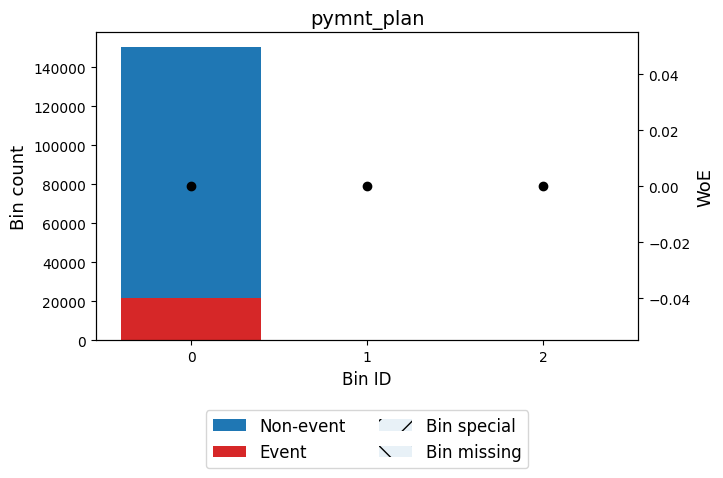

✅ Total IV for initial_list_status: 0.0064
╒═════════╤═════════╤════════════════════╤══════════════════════╤════════════╕
│ Bin     │   Count │   Default Rate (%) │ WOE                  │         IV │
╞═════════╪═════════╪════════════════════╪══════════════════════╪════════════╡
│ ['w']   │   90938 │             0.1354 │ 0.06660548414771172  │ 0.00261859 │
├─────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ ['f']   │   59496 │             0.1556 │ -0.09607696381723474 │ 0.00377726 │
├─────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ Special │       0 │             0      │ 0.0                  │ 0          │
├─────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│ Missing │       0 │             0      │ 0.0                  │ 0          │
├─────────┼─────────┼────────────────────┼──────────────────────┼────────────┤
│         │  150434 │             0.1434 │                      │ 0.00639584 │
╘════════

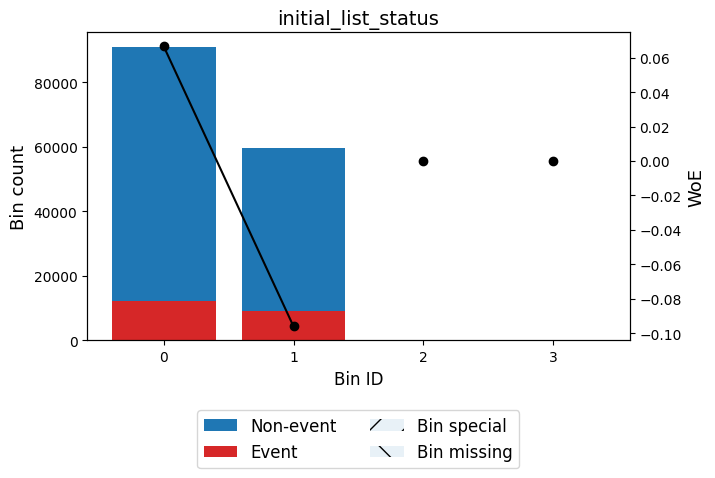

✅ Total IV for application_type: 0.0000
╒════════════════════════════╤═════════╤════════════════════╤═══════╤══════╕
│ Bin                        │   Count │   Default Rate (%) │ WOE   │   IV │
╞════════════════════════════╪═════════╪════════════════════╪═══════╪══════╡
│ ['Joint App' 'Individual'] │  150434 │             0.1434 │ 0.0   │    0 │
├────────────────────────────┼─────────┼────────────────────┼───────┼──────┤
│ Special                    │       0 │             0      │ 0.0   │    0 │
├────────────────────────────┼─────────┼────────────────────┼───────┼──────┤
│ Missing                    │       0 │             0      │ 0.0   │    0 │
├────────────────────────────┼─────────┼────────────────────┼───────┼──────┤
│                            │  150434 │             0.1434 │       │    0 │
╘════════════════════════════╧═════════╧════════════════════╧═══════╧══════╛


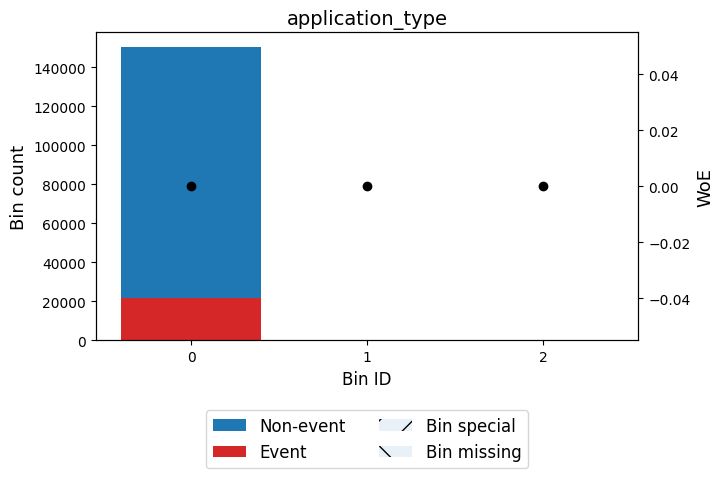

In [60]:
# == Observe IV of Categorical Variables == 
categorical_features = get_categorical_cols(df, TARGET_COL)

for feat in categorical_features: 
    if feat != 'grade': 
        first_bin_and_classify_feature(feat, train_df[feat], train_df[TARGET_COL], dtype='categorical', monotonic_trend_type='auto')


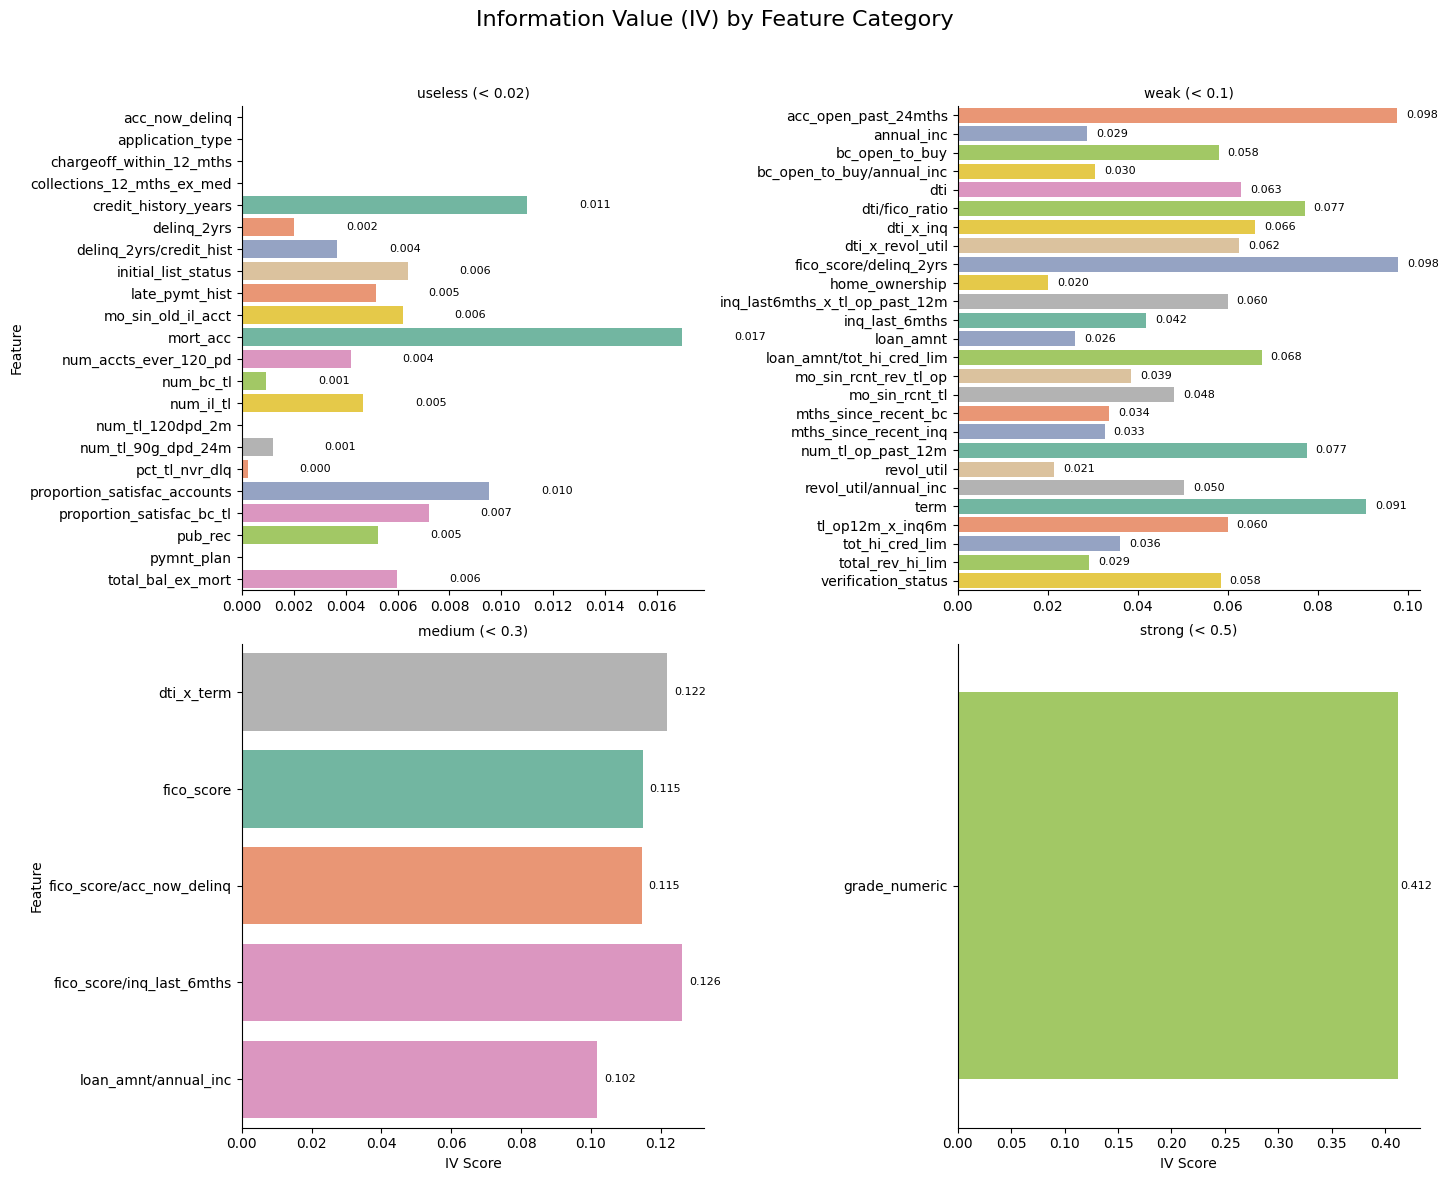

In [61]:
# == Check feature importance ranking == 
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Flatten into a clean DataFrame ===
rows = []
for category, items in iv_categories.items():
    for feature, iv in items:
        rows.append({"Feature": feature, "IV": float(iv), "Category": category})

df_iv = pd.DataFrame(rows).sort_values(by='Feature')

# === 2. Create faceted plots, showing only relevant features in each ===
g = sns.catplot(
    data=df_iv,
    kind="bar",
    x="IV",
    y="Feature",
    col="Category",
    col_wrap=2,
    height=6,
    aspect=1.2,
    sharex=False,       # <== allow different x scales
    sharey=False,       # <== allow different features per facet
    palette="Set2"
)

# === 3. Annotate bars ===
for ax in g.axes.flat:
    for bar in ax.patches:
        width = bar.get_width()
        if width > 0:
            y = bar.get_y() + bar.get_height() / 2
            ax.text(width + 0.002, y, f"{width:.3f}", va='center', fontsize=8)

# === 4. Final polish ===
g.set_titles(col_template="{col_name}")
g.set_xlabels("IV Score")
g.set_ylabels("Feature")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Information Value (IV) by Feature Category", fontsize=16)
plt.show()


In [62]:
print(iv_categories)

{'useless (< 0.02)': [('delinq_2yrs', np.float64(0.002025703801739801)), ('pub_rec', np.float64(0.005255213591157018)), ('collections_12_mths_ex_med', np.float64(0.0)), ('acc_now_delinq', np.float64(0.0)), ('chargeoff_within_12_mths', np.float64(0.0)), ('mo_sin_old_il_acct', np.float64(0.006205806260774911)), ('mort_acc', np.float64(0.016979659138226945)), ('num_accts_ever_120_pd', np.float64(0.004193477358782285)), ('num_bc_tl', np.float64(0.0009284698358350995)), ('num_il_tl', np.float64(0.00466791152530839)), ('num_tl_120dpd_2m', np.float64(0.0)), ('num_tl_90g_dpd_24m', np.float64(0.00119093665450289)), ('pct_tl_nvr_dlq', np.float64(0.00022674412334910317)), ('total_bal_ex_mort', np.float64(0.005997062872342974)), ('credit_history_years', np.float64(0.011003793718698978)), ('proportion_satisfac_accounts', np.float64(0.009532364228223603)), ('proportion_satisfac_bc_tl', np.float64(0.007196905037398256)), ('delinq_2yrs/credit_hist', np.float64(0.003669015753661152)), ('late_pymt_hist'

In [63]:
# == Drop all useless columns (IV < 0.02) automatically) -> Noise == 
# === Drop all useless columns (IV < 0.02) ===
useless_cols = [
    feature
    for category, feature_list in iv_categories.items()
    if category == 'useless (< 0.02)'
    for feature, _ in feature_list
]


print(useless_cols)

df = df.drop(*useless_cols)


['delinq_2yrs', 'pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mort_acc', 'num_accts_ever_120_pd', 'num_bc_tl', 'num_il_tl', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'total_bal_ex_mort', 'credit_history_years', 'proportion_satisfac_accounts', 'proportion_satisfac_bc_tl', 'delinq_2yrs/credit_hist', 'late_pymt_hist', 'pymnt_plan', 'initial_list_status', 'application_type']


✅ Total IV for tot_hi_cred_lim: 0.0344
╒════════════════════════╤═════════╤════════════════════╤══════════════════════╤═════════════╕
│ Bin                    │   Count │   Default Rate (%) │ WOE                  │          IV │
╞════════════════════════╪═════════╪════════════════════╪══════════════════════╪═════════════╡
│ (-inf, 69678.00)       │   51170 │             0.1619 │ -0.14339700727210136 │ 0.00735808  │
├────────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [69678.00, 95471.50)   │   13692 │             0.1614 │ -0.13982841987001904 │ 0.00186975  │
├────────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [95471.50, 130110.50)  │   18188 │             0.1538 │ -0.08280342447830424 │ 0.000853686 │
├────────────────────────┼─────────┼────────────────────┼──────────────────────┼─────────────┤
│ [130110.50, 179962.50) │   13219 │             0.1447 │ -0.01095562829081942 │ 1.05882e-05 │
├──────────

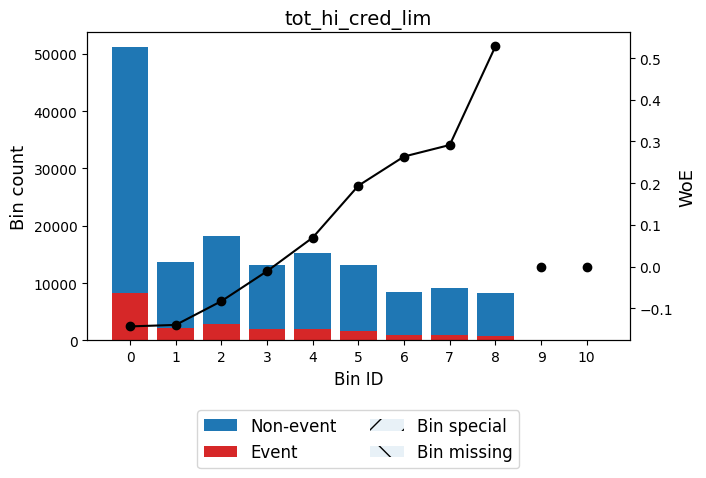

In [64]:
# == Dealing with non-monotonic columns with IV >=0.02 == 


# == tot_hi_cred_lim (v-shaped) == 
first_bin_and_classify_feature('tot_hi_cred_lim', train_df['tot_hi_cred_lim'], train_df[TARGET_COL], dtype='numerical', monotonic_trend_type='auto_asc_desc')

# IV dropped from 0.0361 to 0.0344



In [65]:
# == Get train & test df after dropping columns == 
sampled_df = df.sample(fraction=0.1, seed=42, withReplacement=False).toPandas()
train_df , test_df = oot_train_test_split_pandas(initial_df=sampled_df, date_cut_off='2017-08-01')
train_df.sort_values(by='issue_d', ascending=True)


,id,loan_amnt,term,grade,home_ownership,annual_inc,verification_status,issue_d,default_status,dti,...,inq_last6mths_x_tl_op_past_12m,dti_x_revol_util,loan_amnt/annual_inc,revol_util/annual_inc,bc_open_to_buy/annual_inc,tl_op12m_x_inq6m,dti_x_inq,dti/fico_ratio,loan_amnt/tot_hi_cred_lim,dti_x_term
189356,90376,5000.0,36,A,MORTGAGE,200000.0,Not Verified,2007-07-01,0,3.72,...,0.0,2.604,0.025000,0.000003,0.027495,0.0,0.00,0.004576,0.044189,133.92
189357,109355,1200.0,36,C,RENT,20000.0,Not Verified,2007-07-01,0,2.04,...,4.0,154.632,0.059997,0.003790,0.274936,4.0,4.08,0.003077,0.010605,73.44
189358,113156,3500.0,36,A,RENT,98000.0,Not Verified,2007-08-01,0,8.52,...,0.0,51.120,0.035714,0.000061,0.056112,0.0,0.00,0.011315,0.030932,306.72
189359,121426,3000.0,36,A,OWN,125000.0,Not Verified,2007-08-01,0,2.14,...,0.0,2.140,0.024000,0.000008,0.043992,0.0,0.00,0.002805,0.026513,77.04
189360,117056,5000.0,36,A,MORTGAGE,225000.0,Not Verified,2007-08-01,0,6.48,...,2.0,14.904,0.022222,0.000010,0.024440,2.0,6.48,0.008606,0.044189,233.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94597,112058074,40000.0,36,D,MORTGAGE,82000.0,Verified,2017-07-01,0,34.98,...,0.0,3032.766,0.487799,0.001057,0.029865,0.0,0.00,0.050843,0.067249,1259.28
94596,114159979,26775.0,60,E,OWN,66978.0,Not Verified,2017-07-01,1,30.40,...,0.0,1191.680,0.399752,0.000585,0.534869,0.0,0.00,0.042340,0.257452,1824.00
94595,111741558,28000.0,60,E,RENT,68000.0,Not Verified,2017-07-01,0,19.31,...,2.0,926.880,0.411759,0.000706,0.056984,2.0,19.31,0.028481,0.441919,1158.60
94620,114180778,30000.0,60,C,MORTGAGE,100000.0,Source Verified,2017-07-01,0,23.86,...,0.0,1360.020,0.299997,0.000570,0.140969,0.0,0.00,0.035192,0.073931,1431.60


deuidhuedied 

In [66]:
# == WoE transformation of train_df, test_df == 
train_df = tx_grade(train_df)
test_df = tx_grade(test_df)
train_df = train_df.drop('grade', axis=1)
test_df = test_df.drop('grade', axis=1)


train_df_woe, optb_dict = woe_bin_transform(train_df, non_mono_cols=['tot_hi_cred_lim'])
test_df_woe = apply_woe_transform(test_df, optb_dict)

print("TRAIN_DF_WOE")
print(tabulate(train_df_woe.head(5), headers='keys', tablefmt='psql'))
print(train_df_woe[TARGET_COL].value_counts(normalize=True))

print("TEST_DF_WOE")
print(tabulate(test_df_woe.head(5), headers='keys', tablefmt='psql'))
print(test_df_woe[TARGET_COL].value_counts(normalize=True))


TRAIN_DF_WOE
+--------+--------+---------------------+------------------+-----------------+------------+----------------------+------------------+---------------------------+-----------+------------------------+----------------------+------------------+------------------------+----------------------------+----------------------+-----------------------------+----------------------+----------------------------+-----------------------------+--------------------------+-----------------------+------------------+------------------------------+---------------------------------+---------------------------------+--------------------------------------+------------------------+----------------------------+-----------------------------+---------------------------------+------------------------+-----------------+----------------------+---------------------------------+------------------+---------------------+
|        |     id | issue_d             |   default_status |   loan_amnt_woe |   term_woe 

In [67]:
print(train_df_woe.columns.equals(test_df_woe.columns))


True


In [68]:
train_df_woe.columns

Index(['id', 'issue_d', 'default_status', 'loan_amnt_woe', 'term_woe',
       'home_ownership_woe', 'annual_inc_woe', 'verification_status_woe',
       'dti_woe', 'earliest_cr_line_woe', 'inq_last_6mths_woe',
       'revol_util_woe', 'total_rev_hi_lim_woe', 'acc_open_past_24mths_woe',
       'bc_open_to_buy_woe', 'mo_sin_rcnt_rev_tl_op_woe', 'mo_sin_rcnt_tl_woe',
       'mths_since_recent_bc_woe', 'mths_since_recent_inq_woe',
       'num_tl_op_past_12m_woe', 'tot_hi_cred_lim_woe', 'fico_score_woe',
       'fico_score/delinq_2yrs_woe', 'fico_score/acc_now_delinq_woe',
       'fico_score/inq_last_6mths_woe', 'inq_last6mths_x_tl_op_past_12m_woe',
       'dti_x_revol_util_woe', 'loan_amnt/annual_inc_woe',
       'revol_util/annual_inc_woe', 'bc_open_to_buy/annual_inc_woe',
       'tl_op12m_x_inq6m_woe', 'dti_x_inq_woe', 'dti/fico_ratio_woe',
       'loan_amnt/tot_hi_cred_lim_woe', 'dti_x_term_woe', 'grade_numeric_woe'],
      dtype='object')

In [69]:
import numpy as np

import numpy as np

def check_nans_and_infs(df, name="df"):
    print(f"\n🔍 Checking '{name}':")
    
    # Only check numeric columns for infs
    numeric_df = df.select_dtypes(include=[np.number])
    
    n_nans = df.isnull().sum().sum()
    n_infs = np.isinf(numeric_df.to_numpy()).sum()
    
    print("🧪 NaNs:", n_nans)
    print("🧪 Infs:", n_infs)
    print("🧪 Shape:", df.shape)
    print("✅ Clean:", (n_nans == 0 and n_infs == 0))


check_nans_and_infs(train_df_woe, name="train_df_woe")
check_nans_and_infs(test_df_woe, name="test_df_woe")



🔍 Checking 'train_df_woe':
🧪 NaNs: 0
🧪 Infs: 0
🧪 Shape: (150434, 36)
✅ Clean: True

🔍 Checking 'test_df_woe':
🧪 NaNs: 0
🧪 Infs: 0
🧪 Shape: (67557, 36)
✅ Clean: True


default_status
0    21567
1    21567
Name: count, dtype: int64
Best F1: 0.1278 at threshold 0.67


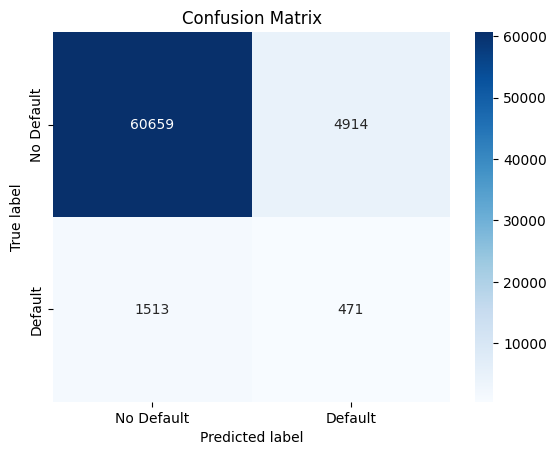

              precision    recall  f1-score   support

           0     0.9757    0.9251    0.9497     65573
           1     0.0875    0.2374    0.1278      1984

    accuracy                         0.9049     67557
   macro avg     0.5316    0.5812    0.5388     67557
weighted avg     0.9496    0.9049    0.9256     67557



Accuracy,▁
F1,▁
Gini,▁
Precision,▁
Recall,▁
Accuracy,0.9049
F1,0.1278
Gini,0.3944
Precision,0.0875
Recall,0.2374


{'Gini': 0.3944, 'F1': 0.1278, 'Precision': 0.0875, 'Recall': 0.2374, 'Accuracy': 0.9049}


In [70]:
# == Evaluate intermediate model performance (sklearn accounts for class imbalance via class weightage)== 
metrics_dict = train_eval_log_logistic_model(train_df=train_df_woe, test_df=test_df_woe, target_col=TARGET_COL, run_name='log_reg_woe_tx', group_name='pd_model_building_2')
print(metrics_dict)

### 2.2 Multicollinearity Handling

In [71]:
# == Observe multicollinearity == 
excluded_columns = ['id', 'issue_d', 'default_status']
numeric_features = [c for c in train_df_woe.select_dtypes(include='number').columns if c not in excluded_columns]

keep, drop = calculate_vif_pandas(train_df_woe, numeric_features)

print("✅ Keep:")
for f, v in keep:
    print(f"  {f}: VIF = {v:.2f}")

print("\n❌ Drop:")
for f, v in drop:
    print(f"  {f}: VIF = {v:.2f}")

/Users/lunlun/Downloads/Github/Credit-Risk-Modeling-PySpark/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


✅ Keep:
  home_ownership_woe: VIF = 1.57
  verification_status_woe: VIF = 1.12
  earliest_cr_line_woe: VIF = 1.02
  total_rev_hi_lim_woe: VIF = 2.66
  acc_open_past_24mths_woe: VIF = 2.45
  mo_sin_rcnt_rev_tl_op_woe: VIF = 2.83
  mo_sin_rcnt_tl_woe: VIF = 2.67
  mths_since_recent_bc_woe: VIF = 1.94
  mths_since_recent_inq_woe: VIF = 1.85
  num_tl_op_past_12m_woe: VIF = 3.95
  tot_hi_cred_lim_woe: VIF = 4.73
  grade_numeric_woe: VIF = 1.95

❌ Drop:
  loan_amnt_woe: VIF = 5.20
  term_woe: VIF = 6.91
  annual_inc_woe: VIF = 7.70
  dti_woe: VIF = 40.42
  inq_last_6mths_woe: VIF = 10.36
  revol_util_woe: VIF = 7.39
  bc_open_to_buy_woe: VIF = 10.74
  fico_score_woe: VIF = 351.09
  fico_score/delinq_2yrs_woe: VIF = 6.44
  fico_score/acc_now_delinq_woe: VIF = 351.28
  fico_score/inq_last_6mths_woe: VIF = 6.39
  inq_last6mths_x_tl_op_past_12m_woe: VIF = inf
  dti_x_revol_util_woe: VIF = 12.04
  loan_amnt/annual_inc_woe: VIF = 5.20
  revol_util/annual_inc_woe: VIF = 11.72
  bc_open_to_buy/annua

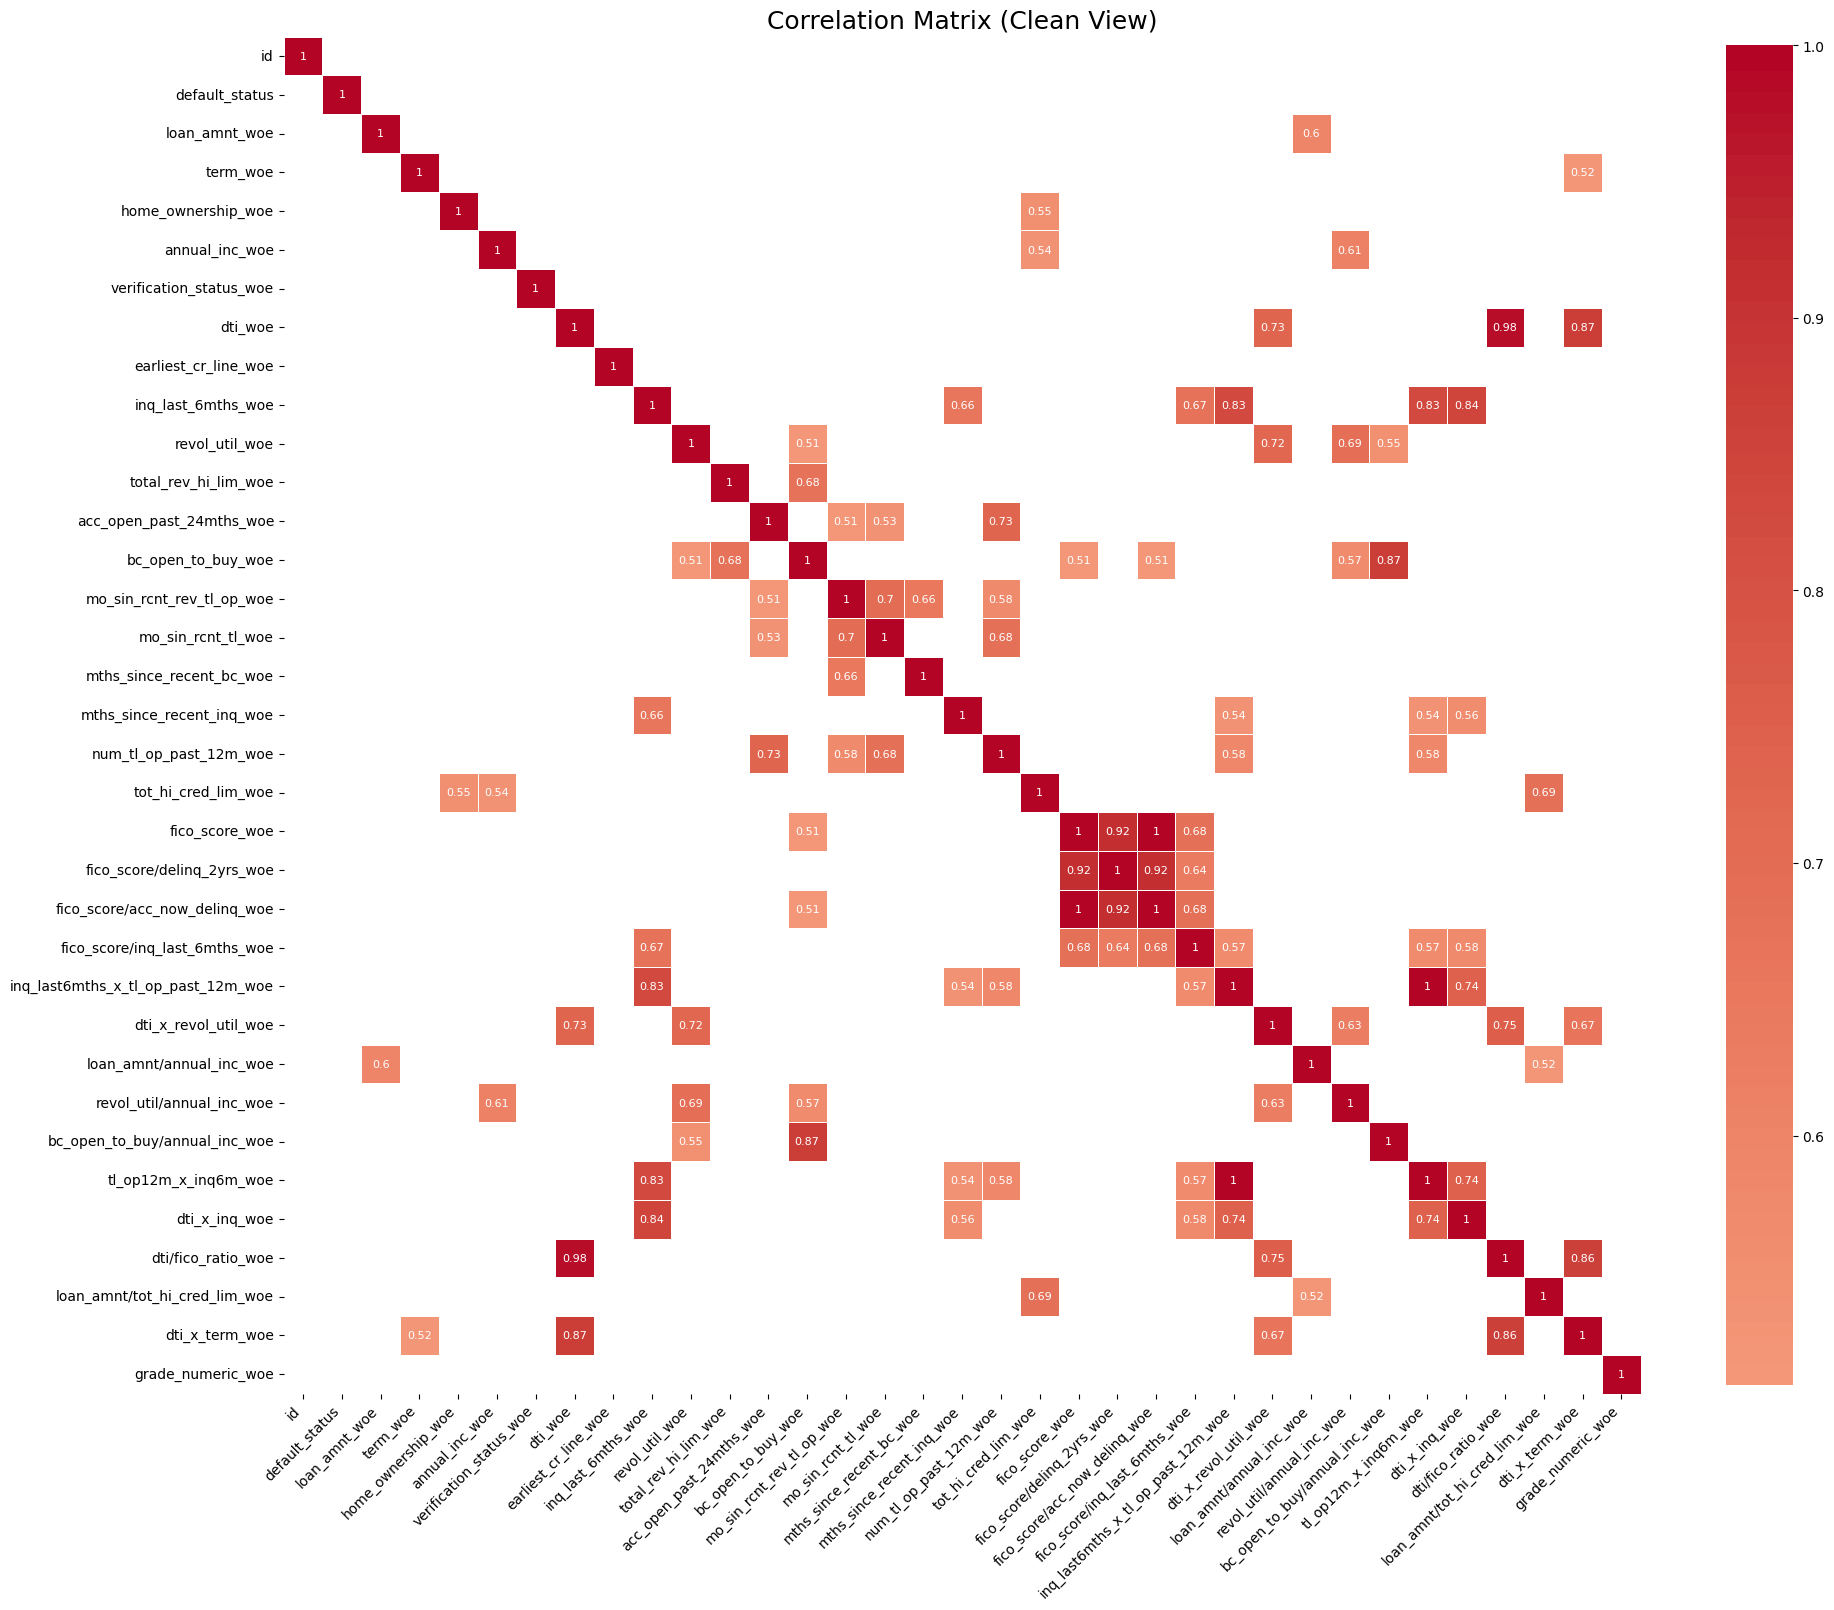

In [72]:
# == Determine which variables to remove == 
threshold = 0.5
corr_matrix = train_df_woe.corr(numeric_only=True)
strong_corrs = corr_matrix[abs(corr_matrix) > threshold]


plt.figure(figsize=(20, 20))

sns.heatmap(
    strong_corrs,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8, "color": "white"},  
    cbar_kws={"shrink": 0.7},
    annot=True
)

plt.title("Correlation Matrix (Clean View)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [73]:
train_df_woe.columns


Index(['id', 'issue_d', 'default_status', 'loan_amnt_woe', 'term_woe',
       'home_ownership_woe', 'annual_inc_woe', 'verification_status_woe',
       'dti_woe', 'earliest_cr_line_woe', 'inq_last_6mths_woe',
       'revol_util_woe', 'total_rev_hi_lim_woe', 'acc_open_past_24mths_woe',
       'bc_open_to_buy_woe', 'mo_sin_rcnt_rev_tl_op_woe', 'mo_sin_rcnt_tl_woe',
       'mths_since_recent_bc_woe', 'mths_since_recent_inq_woe',
       'num_tl_op_past_12m_woe', 'tot_hi_cred_lim_woe', 'fico_score_woe',
       'fico_score/delinq_2yrs_woe', 'fico_score/acc_now_delinq_woe',
       'fico_score/inq_last_6mths_woe', 'inq_last6mths_x_tl_op_past_12m_woe',
       'dti_x_revol_util_woe', 'loan_amnt/annual_inc_woe',
       'revol_util/annual_inc_woe', 'bc_open_to_buy/annual_inc_woe',
       'tl_op12m_x_inq6m_woe', 'dti_x_inq_woe', 'dti/fico_ratio_woe',
       'loan_amnt/tot_hi_cred_lim_woe', 'dti_x_term_woe', 'grade_numeric_woe'],
      dtype='object')

In [74]:
# == Removing variables == 
multicol_rm_vars = ['loan_amnt_woe', 'term_woe', 'annual_inc_woe', 'dti/fico_ratio_woe','dti_x_revol_util_woe', 
                    'dti_woe', 'dti_x_inq_woe', 'inq_last_6mths_woe', 'inq_last6mths_x_tl_op_past_12m_woe', 
                    'tl_op12m_x_inq6m_woe', 'revol_util_woe', 'revol_util/annual_inc_woe', 'bc_open_to_buy/annual_inc_woe', 
                    'fico_score_woe', 'fico_score/acc_now_delinq_woe', 'tot_hi_cred_lim_woe']


train_df_woe = train_df_woe.drop(columns=multicol_rm_vars)
numeric_features = [c for c in train_df_woe.select_dtypes(include='number').columns if c not in excluded_columns]


# == Re-inspection of multicollinearity == 
keep, drop = calculate_vif_pandas(train_df_woe, numeric_features)

print("✅ Keep:")
for f, v in keep:
    print(f"  {f}: VIF = {v:.2f}")

print("\n❌ Drop:")
for f, v in drop:
    print(f"  {f}: VIF = {v:.2f}")


✅ Keep:
  home_ownership_woe: VIF = 1.43
  verification_status_woe: VIF = 1.10
  earliest_cr_line_woe: VIF = 1.02
  total_rev_hi_lim_woe: VIF = 2.09
  acc_open_past_24mths_woe: VIF = 2.35
  bc_open_to_buy_woe: VIF = 2.47
  mo_sin_rcnt_rev_tl_op_woe: VIF = 2.78
  mo_sin_rcnt_tl_woe: VIF = 2.61
  mths_since_recent_bc_woe: VIF = 1.90
  mths_since_recent_inq_woe: VIF = 1.53
  num_tl_op_past_12m_woe: VIF = 2.99
  fico_score/delinq_2yrs_woe: VIF = 2.15
  fico_score/inq_last_6mths_woe: VIF = 2.55
  loan_amnt/annual_inc_woe: VIF = 1.89
  loan_amnt/tot_hi_cred_lim_woe: VIF = 2.09
  dti_x_term_woe: VIF = 1.42
  grade_numeric_woe: VIF = 1.67

❌ Drop:


In [ ]:
test_df_woe = test_df_woe.drop(columns=multicol_rm_vars)

default_status
0    21567
1    21567
Name: count, dtype: int64
Best F1: 0.1290 at threshold 0.66


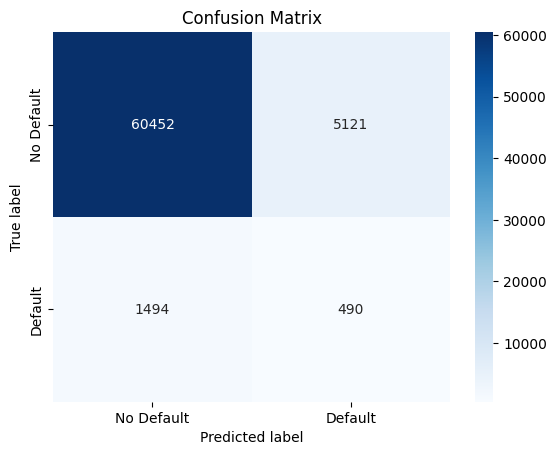

              precision    recall  f1-score   support

           0     0.9759    0.9219    0.9481     65573
           1     0.0873    0.2470    0.1290      1984

    accuracy                         0.9021     67557
   macro avg     0.5316    0.5844    0.5386     67557
weighted avg     0.9498    0.9021    0.9241     67557



Accuracy,▁
F1,▁
Gini,▁
Precision,▁
Recall,▁
Accuracy,0.9021
F1,0.129
Gini,0.3962
Precision,0.0873
Recall,0.247


{'Gini': 0.3962,
 'F1': 0.129,
 'Precision': 0.0873,
 'Recall': 0.247,
 'Accuracy': 0.9021}

In [78]:
train_eval_log_logistic_model(train_df_woe,test_df_woe, target_col=TARGET_COL, run_name='after_multicollineary')

In [79]:
train_df_woe.columns

Index(['id', 'issue_d', 'default_status', 'home_ownership_woe',
       'verification_status_woe', 'earliest_cr_line_woe',
       'total_rev_hi_lim_woe', 'acc_open_past_24mths_woe',
       'bc_open_to_buy_woe', 'mo_sin_rcnt_rev_tl_op_woe', 'mo_sin_rcnt_tl_woe',
       'mths_since_recent_bc_woe', 'mths_since_recent_inq_woe',
       'num_tl_op_past_12m_woe', 'fico_score/delinq_2yrs_woe',
       'fico_score/inq_last_6mths_woe', 'loan_amnt/annual_inc_woe',
       'loan_amnt/tot_hi_cred_lim_woe', 'dti_x_term_woe', 'grade_numeric_woe'],
      dtype='object')

In [80]:
iv_categories

{'useless (< 0.02)': [('delinq_2yrs', np.float64(0.002025703801739801)),
  ('pub_rec', np.float64(0.005255213591157018)),
  ('collections_12_mths_ex_med', np.float64(0.0)),
  ('acc_now_delinq', np.float64(0.0)),
  ('chargeoff_within_12_mths', np.float64(0.0)),
  ('mo_sin_old_il_acct', np.float64(0.006205806260774911)),
  ('mort_acc', np.float64(0.016979659138226945)),
  ('num_accts_ever_120_pd', np.float64(0.004193477358782285)),
  ('num_bc_tl', np.float64(0.0009284698358350995)),
  ('num_il_tl', np.float64(0.00466791152530839)),
  ('num_tl_120dpd_2m', np.float64(0.0)),
  ('num_tl_90g_dpd_24m', np.float64(0.00119093665450289)),
  ('pct_tl_nvr_dlq', np.float64(0.00022674412334910317)),
  ('total_bal_ex_mort', np.float64(0.005997062872342974)),
  ('credit_history_years', np.float64(0.011003793718698978)),
  ('proportion_satisfac_accounts', np.float64(0.009532364228223603)),
  ('proportion_satisfac_bc_tl', np.float64(0.007196905037398256)),
  ('delinq_2yrs/credit_hist', np.float64(0.00366

# 3. Multicollinearity Handling 

Now let's handle multicollinearity. Multicollinearity occurs when two or more features in a dataset are highly correlated with each other. This can lead to:

- 🚫 **Unstable model coefficients**
- 📉 **Reduced model interpretability**
- ⚠️ **Overfitting and inflated variance**

In credit risk modeling, we handle multicollinearity to ensure model robustness and regulatory compliance. From there, we shall compute the VIF (Variance Inflation Factor), which tells us how much 'extra noise' is added to the estimate of a variable, due to how it overlaps with other variables. Since there is no in-built library to calculate VIF in PySpark, we shall sample part of the data and use the following formula to compute each variable's VIF using `statsmodels`

$$
\text{VIF}(X_i) = \frac{1}{1 - R_i^2}
$$


   - VIF < 5 → Acceptable
   - 5 ≤ VIF < 10 → Moderate concern
   - VIF ≥ 10 → Consider removing or combining feature

In [ ]:
# == Check VIF == 
excluded_cols = ['id', 'issue_d', 'default_status']  
numeric_columns = [field.name for field in df2.schema.fields if isinstance(field.dataType, NumericType) and field.name not in excluded_cols]

# Assert excluded columns are not part of numeric_columns at all == 
for column in excluded_cols:
    assert column not in numeric_columns, f"Excluded column '{column}' found in numeric_columns"

sampled_df2 = df2.sample(0.1, seed=42).toPandas()
to_keep, to_drop = calculate_vif_pandas(sampled_df2, numeric_columns, threshold=5)

print("✅ Features to Keep (VIF <= 5.0):")
for feature, vif in to_keep:
    print(f" - {feature}: {vif}")
    
print("\n❌ Features to Drop (VIF > 5.0):")
for feature, vif in to_drop:
    print(f" - {feature}: {vif}")

✅ Features to Keep (VIF <= 5.0):
 - int_rate: 2.8849268089714
 - emp_length: 1.1077135464927519
 - annual_inc: 1.7596482668056619
 - dti: 1.6456253961857639
 - delinq_2yrs: 2.3192966546029625
 - inq_last_6mths: 1.51895165410458
 - revol_util: 4.309654173779169
 - collections_12_mths_ex_med: 1.0249129742147556
 - acc_open_past_24mths: 2.972035910307677
 - chargeoff_within_12_mths: 1.0691529712248735
 - delinq_amnt: 1.1459712645174853
 - mo_sin_old_il_acct: 1.4352744335405097
 - mo_sin_rcnt_rev_tl_op: 2.2684483674465796
 - mo_sin_rcnt_tl: 1.8763471787547568
 - mort_acc: 2.5280954113262606
 - mths_since_recent_bc: 1.6905420305506231
 - mths_since_recent_inq: 1.405743431830612
 - num_accts_ever_120_pd: 1.7918421531655697
 - num_tl_120dpd_2m: 2.023751483003024
 - num_tl_30dpd: 4.46116375780228
 - num_tl_90g_dpd_24m: 2.0257569326475644
 - num_tl_op_past_12m: 2.668725395843891
 - pct_tl_nvr_dlq: 2.1422420646837264
 - percent_bc_gt_75: 3.5481299342219135
 - pub_rec_bankruptcies: 4.261700263396

Now that we have identified the variables that have high VIF, we know that this means something. If I keep these variables in the model, it will inflate the other features' coefficients by too much, leading to an unstable model. However, we should not blindly drop these variables, we have to note that these variables inflate VIF of other variables as well. As such, we should execute the plan below to deal with multicolllinearity. 

1) Find out which variables are highly correlated with each other (Correlation Matrix)
2) In similar variables (highly multicollinear), rank variables (decide which to drop) based on business explanability / statistical significance of IV (Information Value) score / VIF
3) Drop less important variables

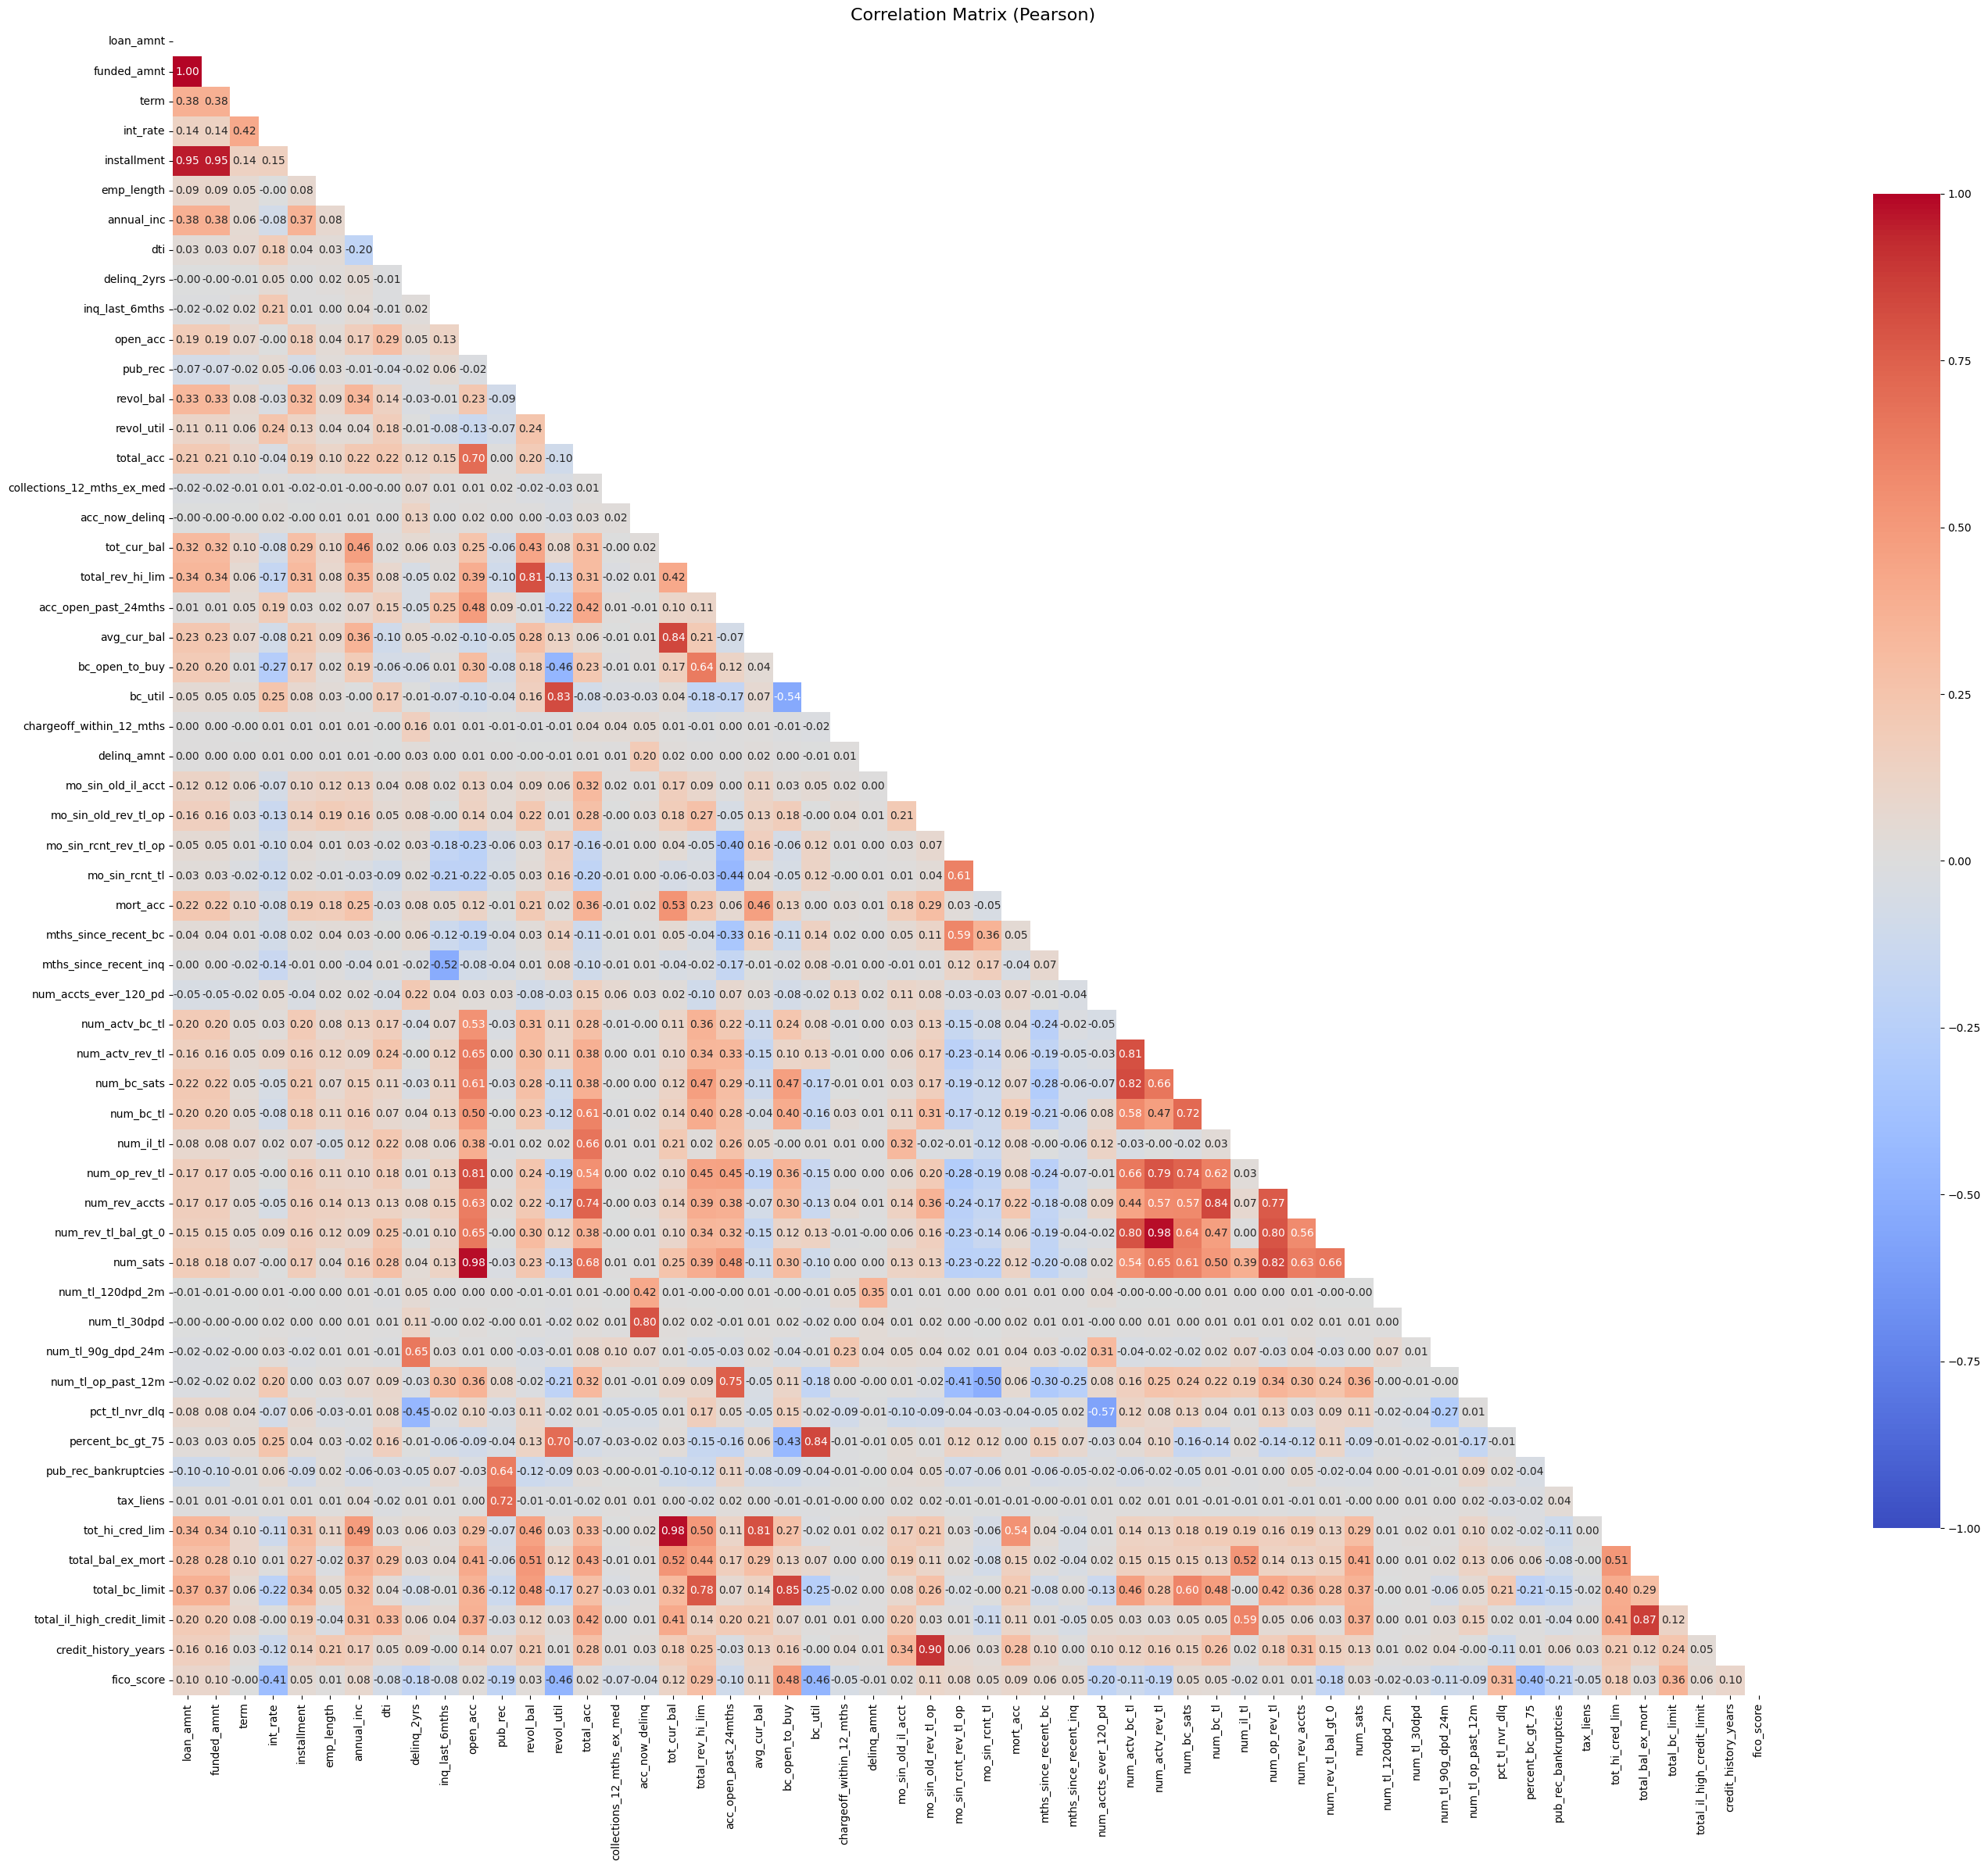

❗ High Correlation Pairs (|ρ| > 0.7):
loan_amnt vs funded_amnt: correlation = 1.00
loan_amnt vs installment: correlation = 0.95
funded_amnt vs installment: correlation = 0.95
open_acc vs num_op_rev_tl: correlation = 0.81
open_acc vs num_sats: correlation = 0.98
pub_rec vs tax_liens: correlation = 0.72
revol_bal vs total_rev_hi_lim: correlation = 0.81
revol_util vs bc_util: correlation = 0.83
revol_util vs percent_bc_gt_75: correlation = 0.70
total_acc vs num_rev_accts: correlation = 0.74
acc_now_delinq vs num_tl_30dpd: correlation = 0.80
tot_cur_bal vs avg_cur_bal: correlation = 0.84
tot_cur_bal vs tot_hi_cred_lim: correlation = 0.98
total_rev_hi_lim vs total_bc_limit: correlation = 0.78
acc_open_past_24mths vs num_tl_op_past_12m: correlation = 0.75
avg_cur_bal vs tot_hi_cred_lim: correlation = 0.81
bc_open_to_buy vs total_bc_limit: correlation = 0.85
bc_util vs percent_bc_gt_75: correlation = 0.84
mo_sin_old_rev_tl_op vs credit_history_years: correlation = 0.90
num_actv_bc_tl vs num_a

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 1) Compute correlation matrix (Pearson)
corr_df = sampled_df2[numeric_columns].corr()

# 2) Optional: mask upper triangle so it's easier to read
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# 3) Plot heatmap
plt.figure(figsize=(28, 24))
sns.heatmap(
    corr_df,
    mask=mask,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix (Pearson)", fontsize=16)
plt.tight_layout()
plt.show()

# 4) Extract high-correlation pairs
threshold = 0.7
high_corr_pairs = [
    (col1, col2, corr_df.loc[col1, col2])
    for i, col1 in enumerate(corr_df.columns)
    for j, col2 in enumerate(corr_df.columns)
    if i < j and abs(corr_df.loc[col1, col2]) > threshold
]

print(f"❗ High Correlation Pairs (|ρ| > {threshold}):")
for var1, var2, corr_val in high_corr_pairs:
    print(f"{var1} vs {var2}: correlation = {corr_val:.2f}")


From the correlation matrix, we have identified some high correlation pairs with | Pearson Coefficient | > 0.7. Let's group highly correlated variables together. We shall understand why they may be highly correlated along the way, and drop the less important feature as a result. **Less important** can be based on IV calculation, business intuition or explanability. 

| #  | Cluster (ρ ≥ 0.70)                                                                                                 | **Keep (this)**            | Drop (these)                                                                                       | Key justification & reason for correlation                                                                                                                                                                                              |
| -- | ------------------------------------------------------------------------------------------------------------------ | -------------------------- | -------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| 1  | `loan_amnt` ↔ `installment` (0.95)                                                                                 | **`loan_amnt`**            | `installment`                                                                                      | Raw loan amount is intuitive; `installment` is a derived feature of amount × interest rate × term                                                              |
| 2  | Account counts: `open_acc`, `total_acc`, `num_op_rev_tl`, `num_sats` , `num_rev_accts`                          | **`open_acc`**   , `num_sats` -> create interaction feature to reduce multicollinearity and measure proportion of accounts which are satisfactory          | `total_acc`, `num_op_rev_tl`, `num_rev_accts`                            | “Open accounts”, though has > VIF than `total_acc`, but reflects borrower's recent credit behaviour. The rest just have high VIF values, and ought to be dropped.   |
| 3  | Revolving limits/balances: `revol_bal` ↔ `total_rev_hi_lim`                                 | **`total_rev_hi_lim`**            | `revol_bal`,                                                                | Both has similar VIF, `total_rev_hi_lim` can measure credit capacity a borrower has. `revol_bal` does is already utilised in calculation of `revol_val`;                                                                        |
| 4  | Utilisation trio: `revol_util`, `bc_util`, `percent_bc_gt_75`                                                      | **`revol_util`**           | `bc_util`, `percent_bc_gt_75`                                                                      | Overall revolving‑utilisation is industry standard, regulator‑friendly, and usually leads IV. `bc_util` is just a part of `revol_util` and many borrowers will hit the 75% threshold when utilisation is high                                                             |
| 5  | Delinquency snapshot: `acc_now_delinq` ↔ `num_tl_30dpd`                                                            | **`acc_now_delinq`**       | `num_tl_30dpd`                                                                                     | “Accounts now delinquent” is cleaner (represents borrower's financial capability at point of loan origination). Both have similar VIF, and `num_tl_30dpd` represents number of tradelines / accounts with 30+ days past payment date, which overlaps strongly with features like `num_tl_120dpd`.  Delinquencies which may have been cleared can be in `num_tl_30dpd` as well.                                                   |
| 6  | Current balances vs limits: `tot_cur_bal`, `avg_cur_bal`, `tot_hi_cred_lim`                                        | **`tot_hi_cred_lim`**          | `avg_cur_bal`, `tot_cur_bal`                                                                   | `avg_cur_bal` & other features in this cluster and `tot_hi_cred_lim` is highly correlated. We decided to leave `tot_hi_cred_lim` in Cluster 3 to assess if sum of all credit limits across trade lines has an impact on probability of a defaulted loan.                                                                          |
| 7  | Bank‑card limit vs availability: `bc_open_to_buy` ↔ `total_bc_limit`                                               | **`bc_open_to_buy`**       | `total_bc_limit`                                                                                   | Both have similar VIF values. `total_bc_limit` is a subset in `tot_hi_cred_lim` feature earlier, since `total_bc_limit` is only the credit limit across bank cards, e.g. credit cards, but `tot_hi_cred_lim` refers to this, and credit limits of mortgages, installment accounts etc.   `bc_open_to_buy` can help us assess if a borrower's credit capacity can have impact on default probability.                                                                                                 |
| 8  | Credit‑history length: `mo_sin_old_rev_tl_op` ↔ `credit_history_years`                                             | **`credit_history_years`** | `mo_sin_old_rev_tl_op`                                                                             | Both are metrics of a borrower's credit history. `mo_sin_old_rev_tl_op` is more granular (only refers to revolving trade lines, excluding mortgages and installments etc). Entire credit history is a better measure, especially when both have similar VIF.                                                                                                 |
| 9  | Active revolving lines: `num_actv_bc_tl`, `num_actv_rev_tl`, `num_rev_tl_bal_gt_0`, `num_bc_sats`, `num_op_rev_tl` | **`num_actv_bc_tl`, `num_bc_sats`** -> Interaction feature to calculate proportion of satisfactory bank cards (removes multicollinearity between these 2 features)       | `num_actv_rev_tl`, `num_rev_tl_bal_gt_0`, `num_op_rev_tl` (already dropped in Cl 2) |  `num_rev_tl_bal_gt_0` has high VIF, `num_actv_rev_tl` only represents number of active accounts, without taking into account the proportion of good credit performance, which is crucial in estimating default probability                                                                                                     |
| 10 | Tradeline breadth: `num_bc_tl` ↔ `num_rev_accts`                                                                   | **`num_bc_tl`**            | `num_rev_accts`                                                                                    | Credit Cards are more specific, and provide insight to whether number of bank cards issued affects consumer credit risk the most, compared to revolving accounts (which can include HELOC -> using part of one's house as collateral); “all revolving accts” is broader but collinear and weaker in IV tests.                                                                                                  |
| 11 | Installment‑loan exposure: `total_bal_ex_mort` ↔ `total_il_high_credit_limit`                                      | **`total_bal_ex_mort`**    | `total_il_high_credit_limit`                                                                       | Balance‑excluding‑mortgage is a direct leverage measure of borrower's current financial situation; high‑credit limit is more policy‑driven, than representative of a borrower's financial situation                                                                                            |


Now, after dropping the relevant variables and creating the interaction features, let's examine if there are still multicollinearity between our features.

In [ ]:
to_drop_cols = [
    "installment", 
    "total_acc", "num_op_rev_tl", "num_rev_accts", 
    "revol_bal", 
    "bc_util", "percent_bc_gt_75",
    "num_tl_30dpd", 
    "avg_cur_bal", "tot_cur_bal", 
    "total_bc_limit", 
    "mo_sin_old_rev_tl_op",
    "num_actv_rev_tl", "num_rev_tl_bal_gt_0", "num_op_rev_tl",
    "num_rev_accts", 
    "total_il_high_credit_limit",
]

df = df.drop(*to_drop_cols)

df = df.withColumn('proportion_satisfac_accounts', col('num_sats')/(col('open_acc') + lit(1) )) # prevent division by 0 
df = df.withColumn('proportion_satisfac_bc_tl', col('num_bc_sats')/(col('num_actv_bc_tl') + lit(1)))

new_numeric_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType) and field.name not in excluded_cols]

to_keep1, to_drop1 = calculate_vif(df, new_numeric_columns, threshold=5.0, sample_frac=0.05)

print("✅ Features to Keep (VIF <= 5.0):")
for feature, vif in to_keep1:
    print(f" - {feature}: {vif}")
    
print("\n❌ Features to Drop (VIF > 5.0):")
for feature, vif in to_drop1:
    print(f" - {feature}: {vif}")


✅ Features to Keep (VIF <= 5.0):
 - loan_amnt: 1.4838107645317313
 - term: 1.203822544931172
 - annual_inc: 1.2597605485339933
 - dti: 1.3058044380431724
 - delinq_2yrs: 2.198158548598535
 - inq_last_6mths: 1.481066645661674
 - revol_util: 2.1353108864763515
 - collections_12_mths_ex_med: 1.031287705584974
 - acc_now_delinq: 1.1869032513464288
 - total_rev_hi_lim: 3.0142037558010615
 - acc_open_past_24mths: 2.9927781988919713
 - bc_open_to_buy: 2.9928739759496077
 - chargeoff_within_12_mths: 1.0562702666646604
 - delinq_amnt: 1.1123619486702645
 - mo_sin_old_il_acct: 1.3270438213998685
 - mo_sin_rcnt_rev_tl_op: 2.2390177545556993
 - mo_sin_rcnt_tl: 1.859408059654659
 - mort_acc: 1.5886503575662072
 - mths_since_recent_bc: 1.7019466830070344
 - mths_since_recent_inq: 1.4168501658363626
 - num_accts_ever_120_pd: 1.7755456723701109
 - num_bc_tl: 2.6012336024633864
 - num_il_tl: 2.0003655056486735
 - num_tl_120dpd_2m: 1.2610515512654727
 - num_tl_90g_dpd_24m: 1.942911686416379
 - num_tl_op